In [1]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index

from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImblearnPipeline


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import hyperparameter_tuning_clasification_smote, validate_model_classification_smote, hyperparameter_tuning_linear_on_preprocessed_dataset, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
545                                                         1                     187.0   50.85                  4.830532    89.0        168.0  31.533447                              107.0                                   70.0           0.0                      90.0    1.0                   106.0               0.849057             0.0              1.0                   0.535714       1.0                                                       2.0                              0.0                           1.0                                             1.0                                              1.0   0.0        1.0                                                        12.0               1.0           1.0             1.0                              3.600                             4.704           8.304                                  1.0                  1.0                   6.8026                     10.820                 17.6226             0.0          5.40   
824                                                         2                       NaN     NaN                       NaN    58.5        169.0  20.482476                               90.0                                   69.0           0.0                      75.0    0.0                    82.0               0.914634             1.0              1.0                   0.443787       0.0                                                       0.0                              1.0                           1.0                                             0.0                                              0.0   0.0        1.0                                                         9.0               1.0           1.0             0.0                              3.600                             2.450           6.050                                  0.0                  0.0                   8.4000                      7.680                 16.0800             0.0          6.68   
140                                                         0                       NaN   32.50                       NaN    56.5        170.0  19.550173                                NaN                                    NaN           NaN                      62.0    0.0                    81.0               0.765432             0.0              0.0                   0.364706       0.0                                                       0.0                              NaN                           NaN                                             NaN                                              NaN   0.0        0.0                                                         NaN               NaN           NaN             1.0                              3.510                             3.990           7.500                                  0.0                  1.0                      NaN                        NaN                     NaN             NaN          4.70   
514                                                      

### Remove all classes but hehalthy and FHA

In [3]:
df.loc[(df[PCO] != 0) & (df[PCO] != 2), PCO] = np.nan

#  change all 2s to 1s for the need of the visualisation algorithm
df[PCO] = np.where(df[PCO] == 2, 1, df[PCO])

CLASS_NAMES = ['healthy', 'FHA']

In [4]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(377, 135)


<Axes: >

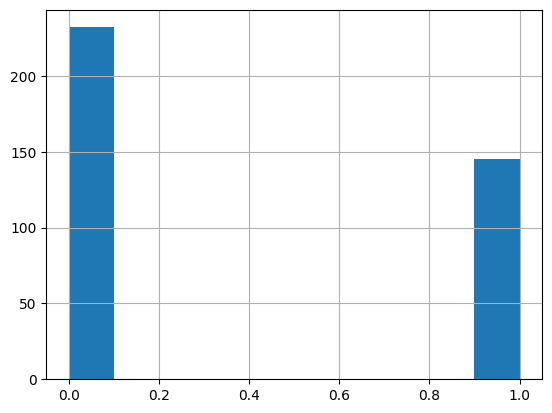

In [5]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

## Best preprocessing

### For SMOTE

In [6]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [7]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [9]:
# smote
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [6, 7],
    'model__min_samples_leaf': [3, 4, 5],
    # 'class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_clasification_smote(X_train, y_train, PCO, model_tree, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


Best parameters: {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}
Best score (f1_weighted): 0.7554802317498471


params  mean_train_score  mean_test_score
5   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.857330         0.755480
1   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.860866         0.754848
4   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.857051         0.753205
2   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.858952         0.749309
0   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.861984         0.748244
16  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.916411         0.747347
3   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.858924         0.745094
17  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.915897         0.742991
12  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.934721         0.741700
14  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.921609         0.740131
13  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.929442         0.738593
15  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.921033         0.737457
10  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.892563         0.727014
6   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.907833         0.727002
11  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.892563         0.725948
9   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.897633         0.725872
7   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.903907         0.724167
8   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.896532         0.723975

In [10]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}
Best score (f1_weighted): 0.7436604577246348


params  mean_train_score  mean_test_score
18  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.940073         0.743660
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.862264         0.742341
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.926107         0.742275
24  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.919101         0.742024
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.867302         0.741697
6   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.861933         0.741459
8   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.861933         0.741357
14  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.905807         0.741055
19  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.940085         0.741020
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.867302         0.740677
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.918799         0.739611
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.863889         0.739605
26  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.917962         0.739070
20  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.940963         0.737556
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.863889         0.735360
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.898826         0.734202
22  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.926899         0.733037
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.866308         0.732940
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.899387         0.732710
12  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.905807         0.732541
10  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.913803         0.731833
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.

In [11]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [15:19<00:00,  9.28s/it]


cv_score
18 -0.493617
64 -0.504952
75 -0.507124
45 -0.509694
55 -0.509711

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 2}
Best score (f1_weighted): 0.715119149273523


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


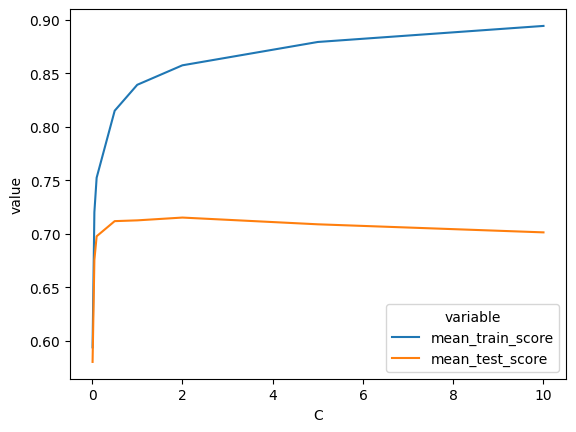

C  mean_train_score  mean_test_score
0  0.01          0.593938         0.580321
1  0.05          0.720085         0.675474
2   0.1          0.752316         0.697647
3   0.5          0.814890         0.711791
4     1          0.839098         0.712511
5     2          0.857298         0.715119
6     5          0.879089         0.708827
7    10          0.894077         0.701297

In [12]:
model_lr = LogisticRegression(max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.05

### Random Forest

In [72]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.913822         0.782616
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.928839         0.780565
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.948672         0.780479
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.930861         0.778460
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.948119         0.778261
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.929055         0.778234
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.915132         0.777261
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.947720         0.775780
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.912644         0.774311

In [12]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [19:35<00:00, 11.88s/it]


cv_score
25  -0.39638
56 -0.398133
70 -0.399275
94 -0.402765
98 -0.405842

### SVM

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

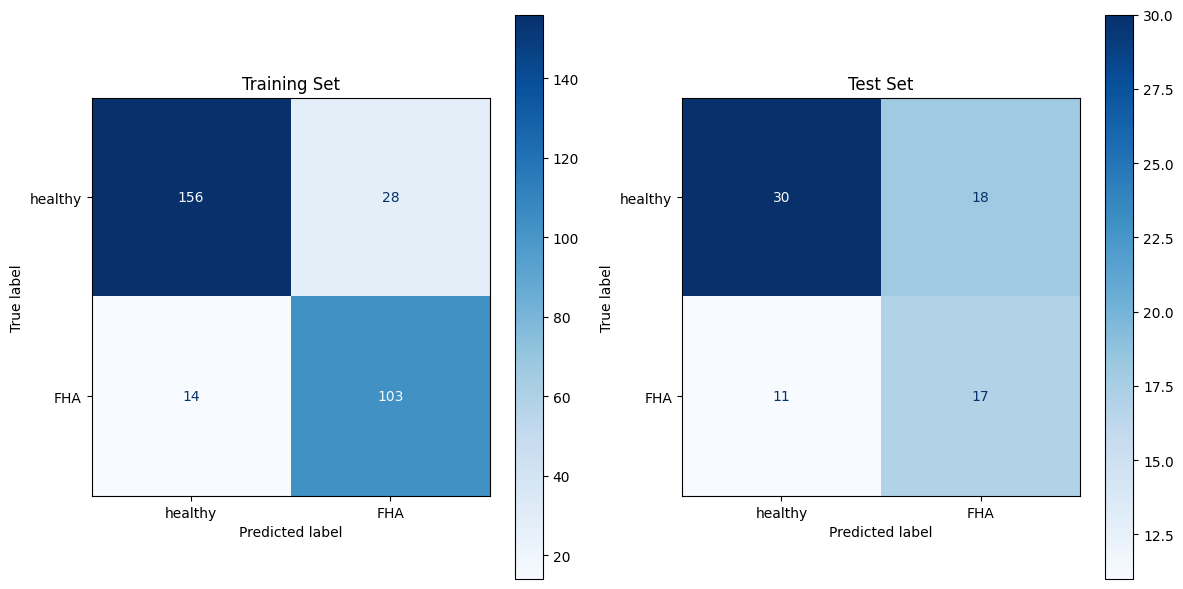

Training set
              precision    recall  f1-score   support

     healthy       0.92      0.85      0.88       184
         FHA       0.79      0.88      0.83       117

    accuracy                           0.86       301
   macro avg       0.85      0.86      0.86       301
weighted avg       0.87      0.86      0.86       301

Test set
              precision    recall  f1-score   support

     healthy       0.73      0.62      0.67        48
         FHA       0.49      0.61      0.54        28

    accuracy                           0.62        76
   macro avg       0.61      0.62      0.61        76
weighted avg       0.64      0.62      0.62        76



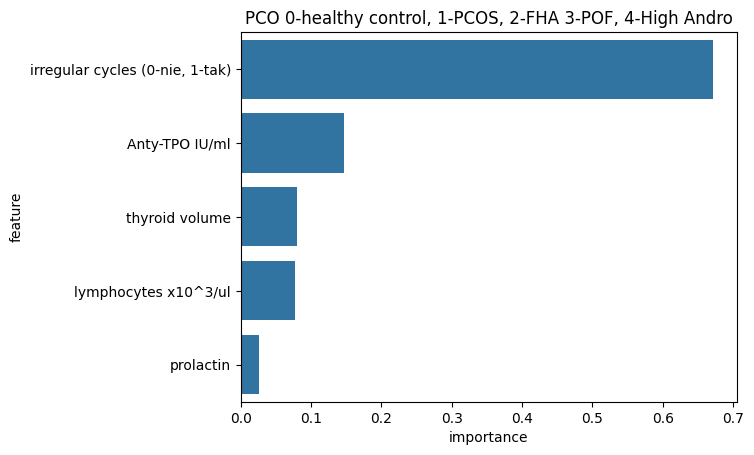

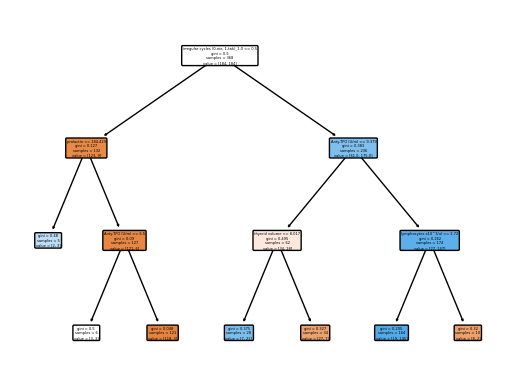

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


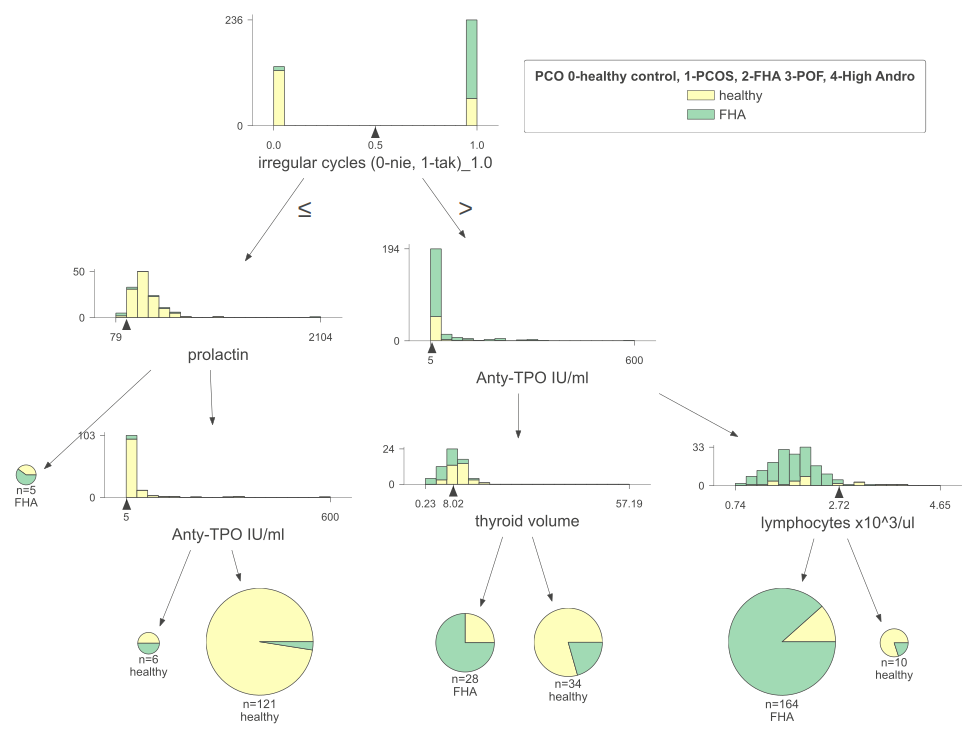

In [8]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=7, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


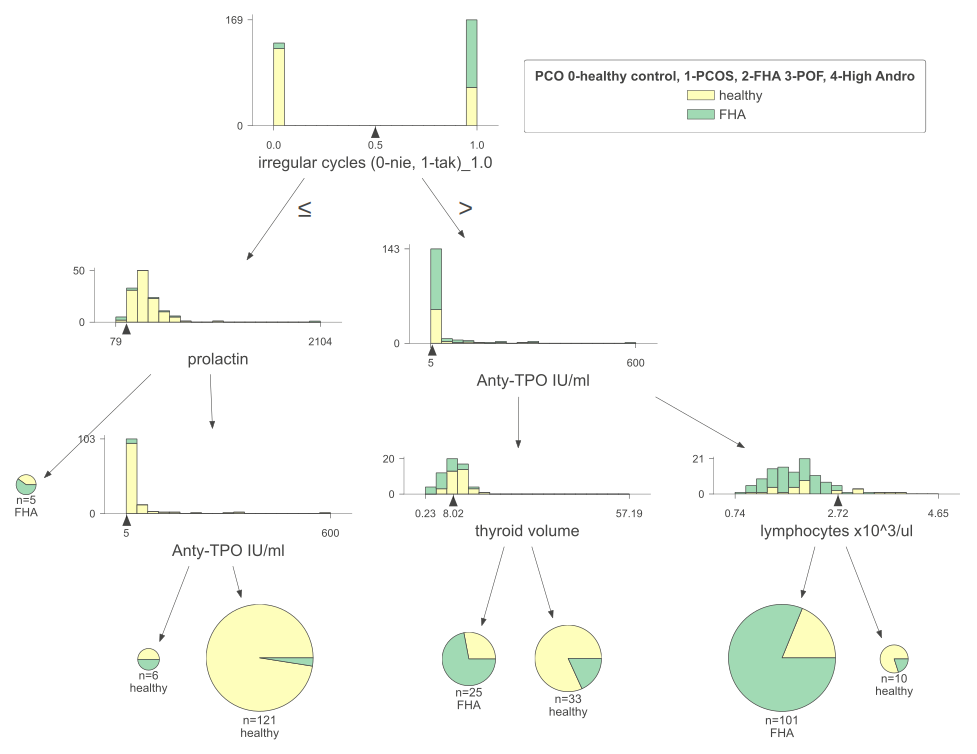

In [9]:
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

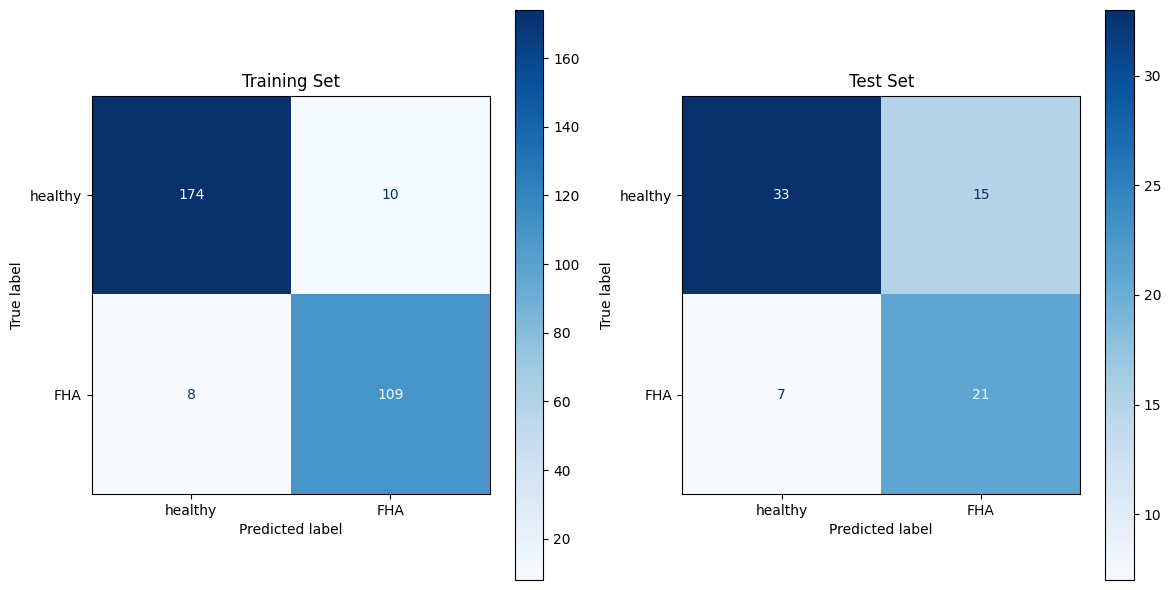

Training set
              precision    recall  f1-score   support

     healthy       0.96      0.95      0.95       184
         FHA       0.92      0.93      0.92       117

    accuracy                           0.94       301
   macro avg       0.94      0.94      0.94       301
weighted avg       0.94      0.94      0.94       301

Test set
              precision    recall  f1-score   support

     healthy       0.82      0.69      0.75        48
         FHA       0.58      0.75      0.66        28

    accuracy                           0.71        76
   macro avg       0.70      0.72      0.70        76
weighted avg       0.74      0.71      0.72        76



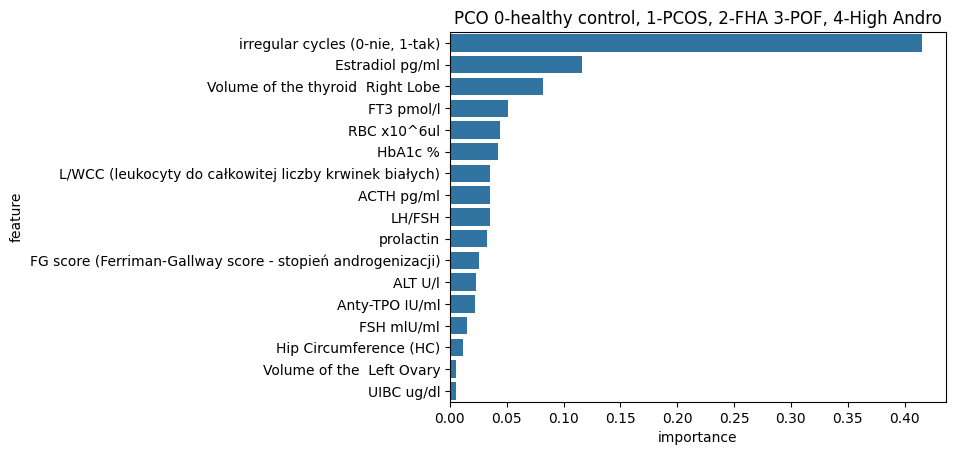

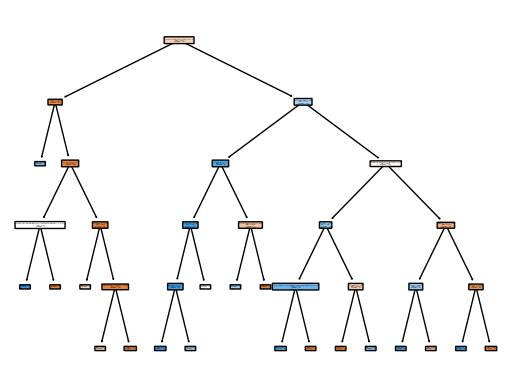

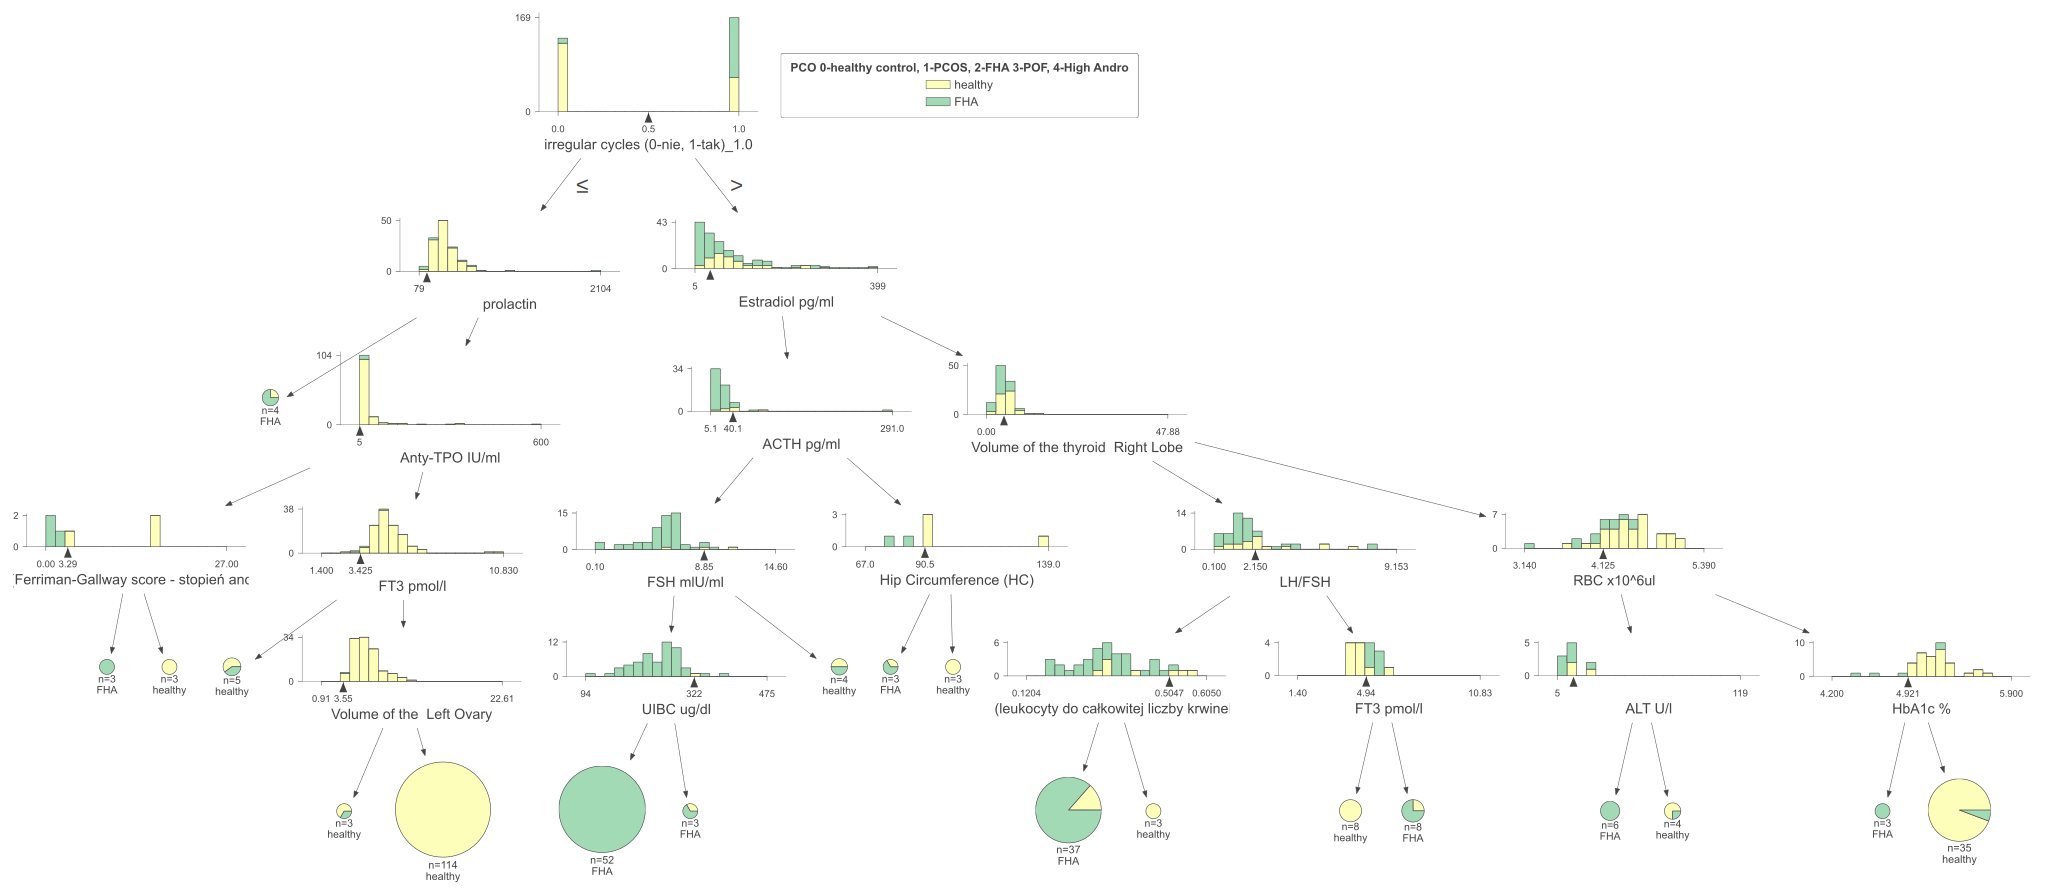

In [10]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3, min_samples_split=4, class_weight=None, splitter='best')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

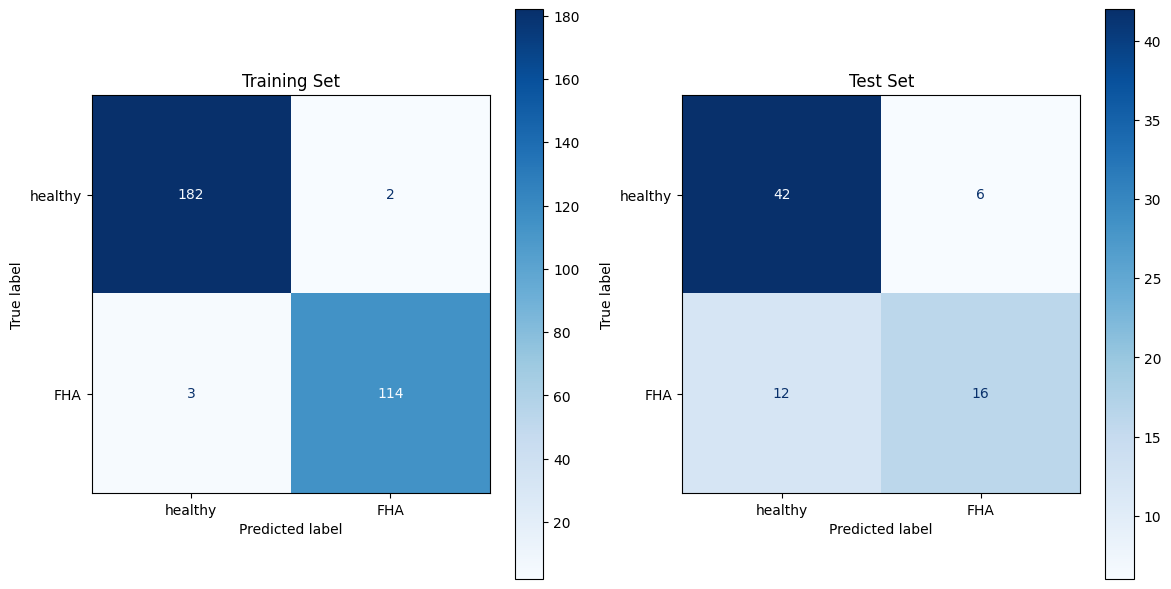

Training set
              precision    recall  f1-score   support

     healthy       0.98      0.99      0.99       184
         FHA       0.98      0.97      0.98       117

    accuracy                           0.98       301
   macro avg       0.98      0.98      0.98       301
weighted avg       0.98      0.98      0.98       301

Test set
              precision    recall  f1-score   support

     healthy       0.78      0.88      0.82        48
         FHA       0.73      0.57      0.64        28

    accuracy                           0.76        76
   macro avg       0.75      0.72      0.73        76
weighted avg       0.76      0.76      0.76        76



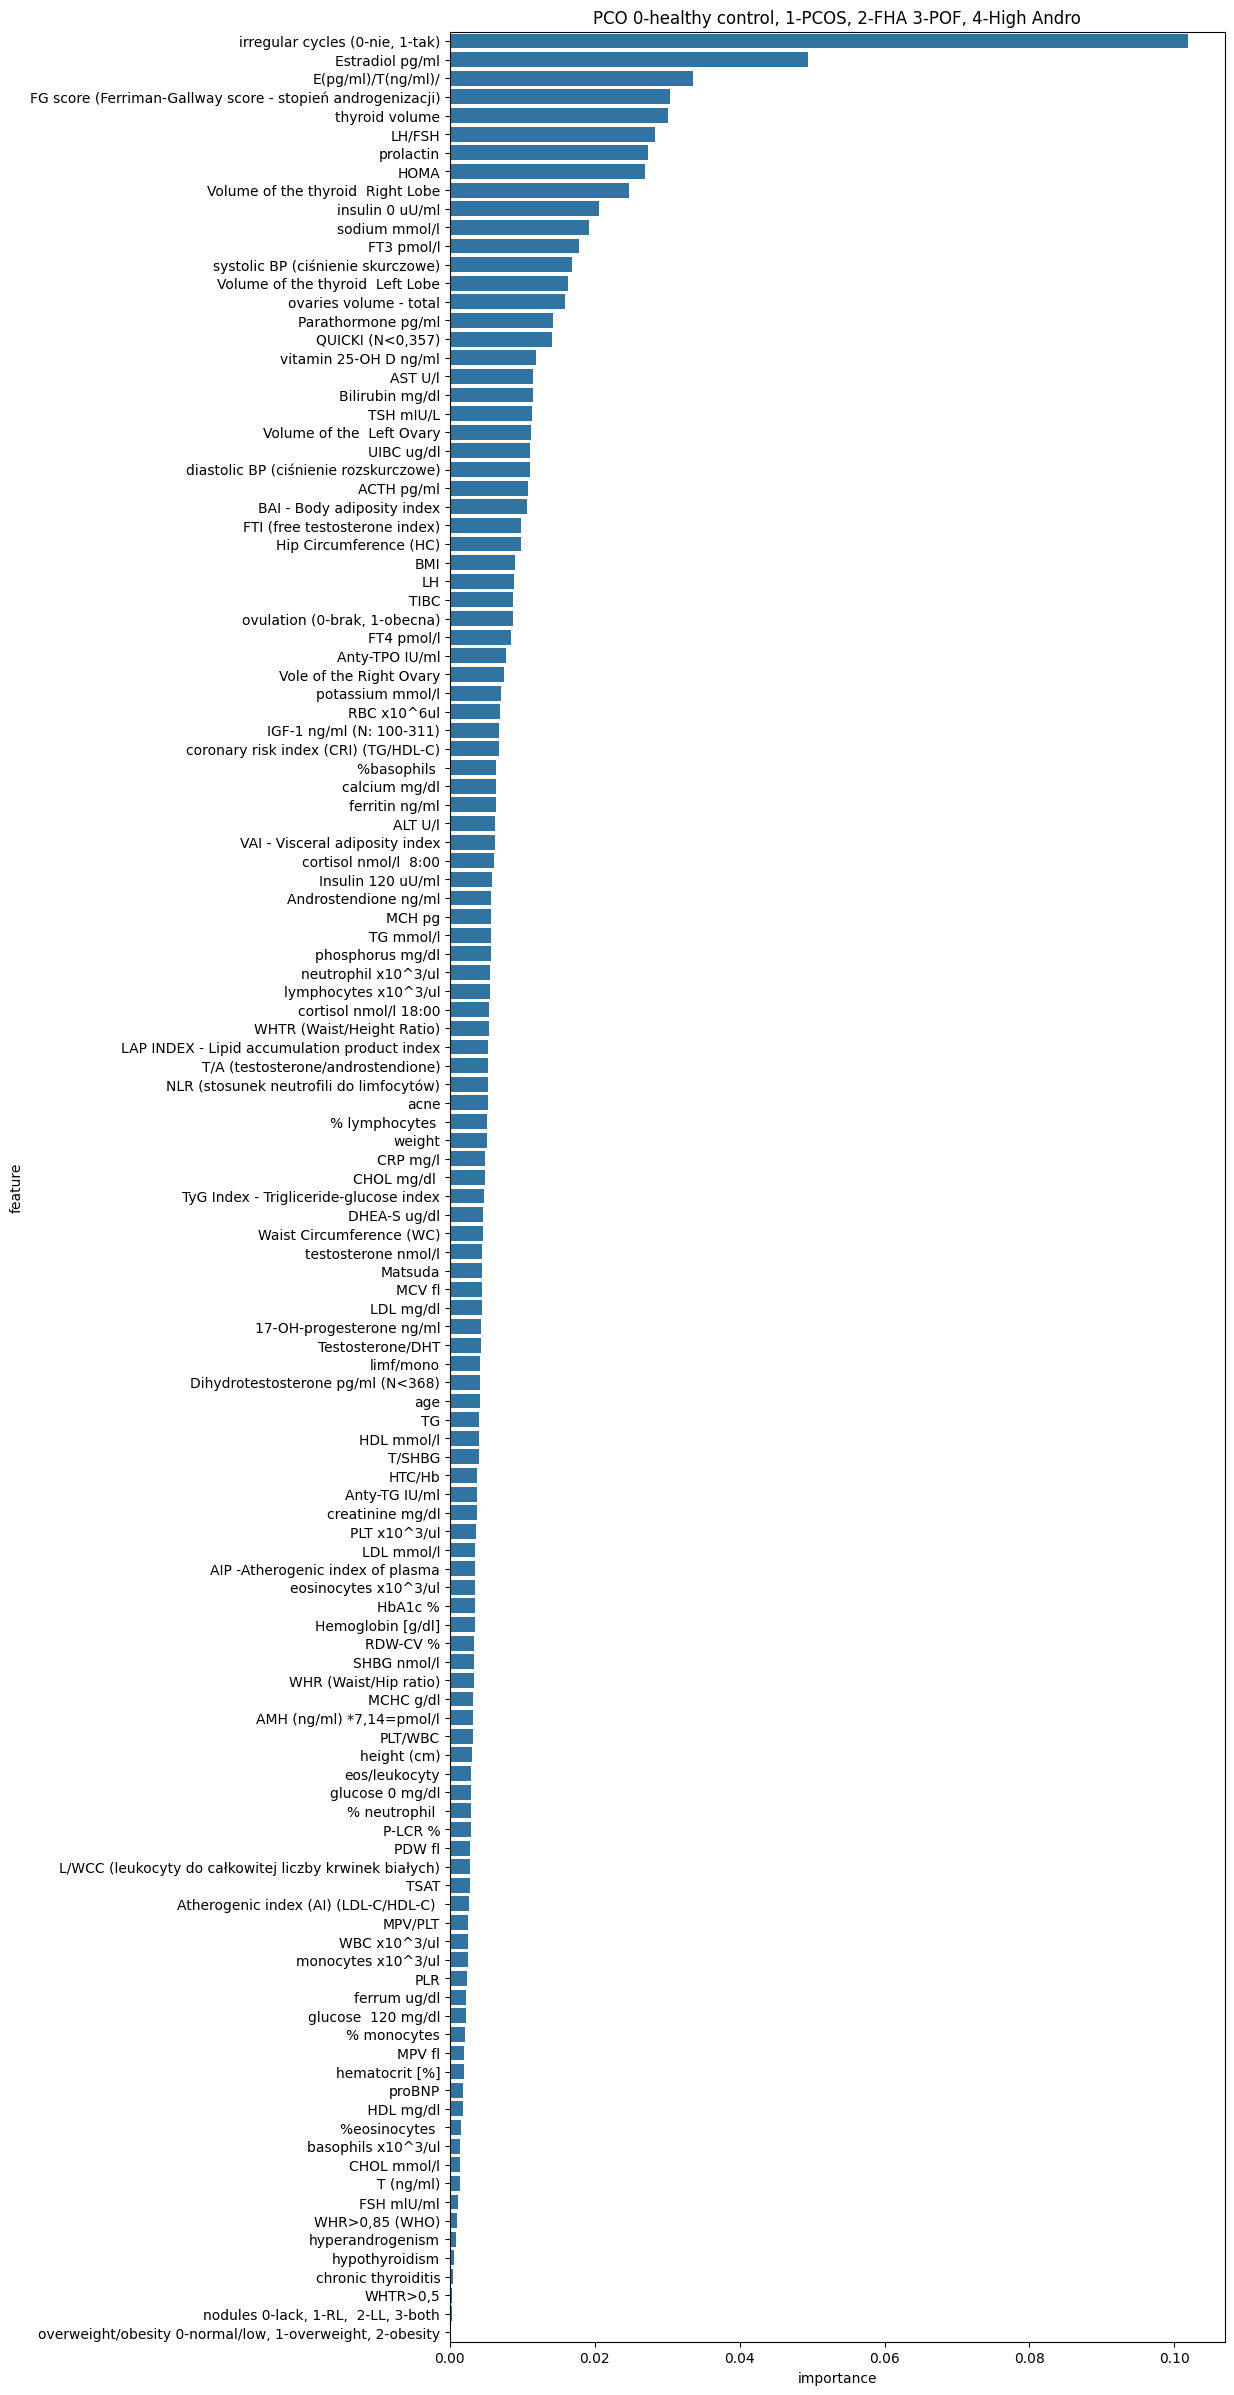

In [12]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=4, class_weight='balanced_subsample')

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

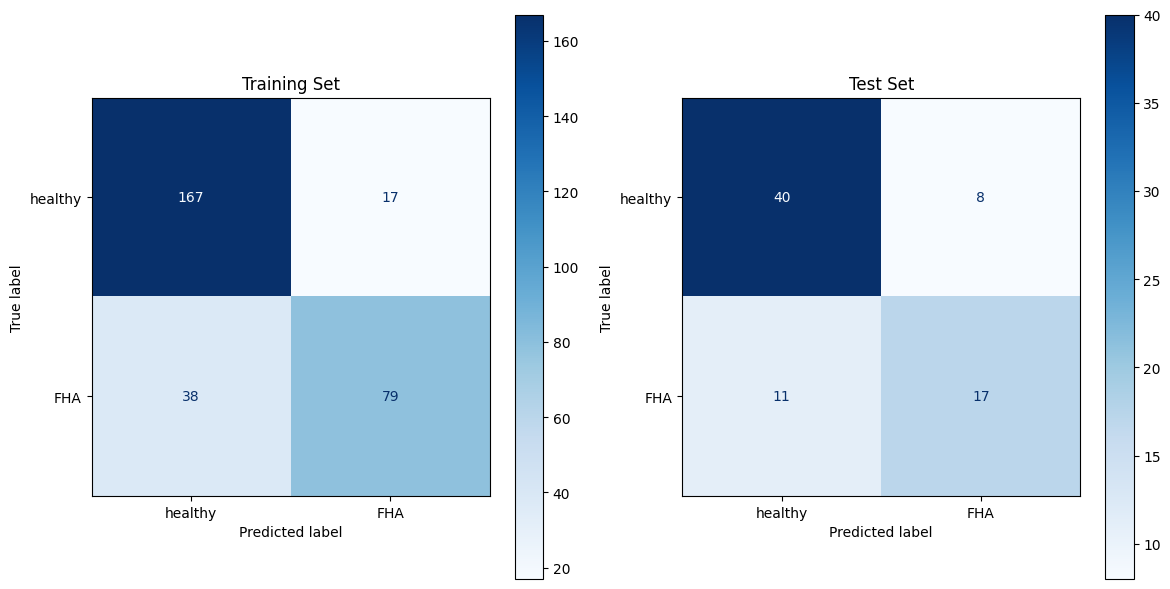

Training set
              precision    recall  f1-score   support

     healthy       0.81      0.91      0.86       184
         FHA       0.82      0.68      0.74       117

    accuracy                           0.82       301
   macro avg       0.82      0.79      0.80       301
weighted avg       0.82      0.82      0.81       301

Test set
              precision    recall  f1-score   support

     healthy       0.78      0.83      0.81        48
         FHA       0.68      0.61      0.64        28

    accuracy                           0.75        76
   macro avg       0.73      0.72      0.72        76
weighted avg       0.75      0.75      0.75        76



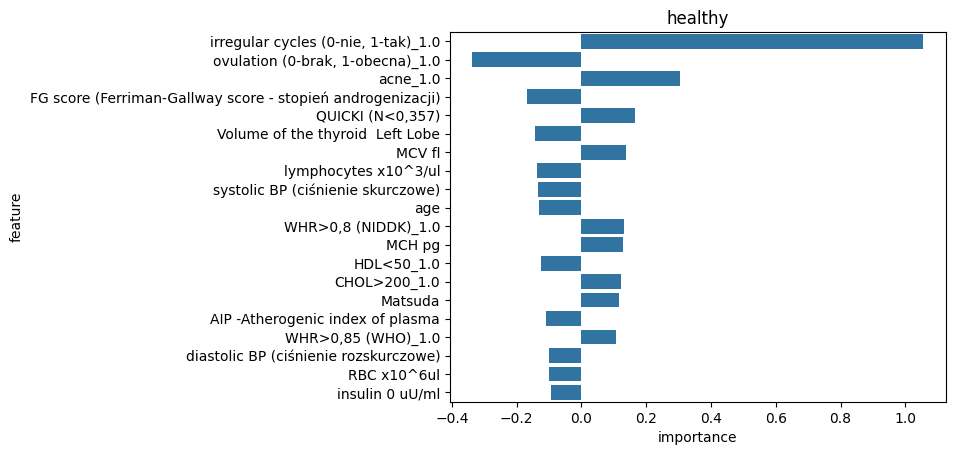

In [13]:
model_lr = LogisticRegression(C=0.05, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [28]:
selected_features_map = {}

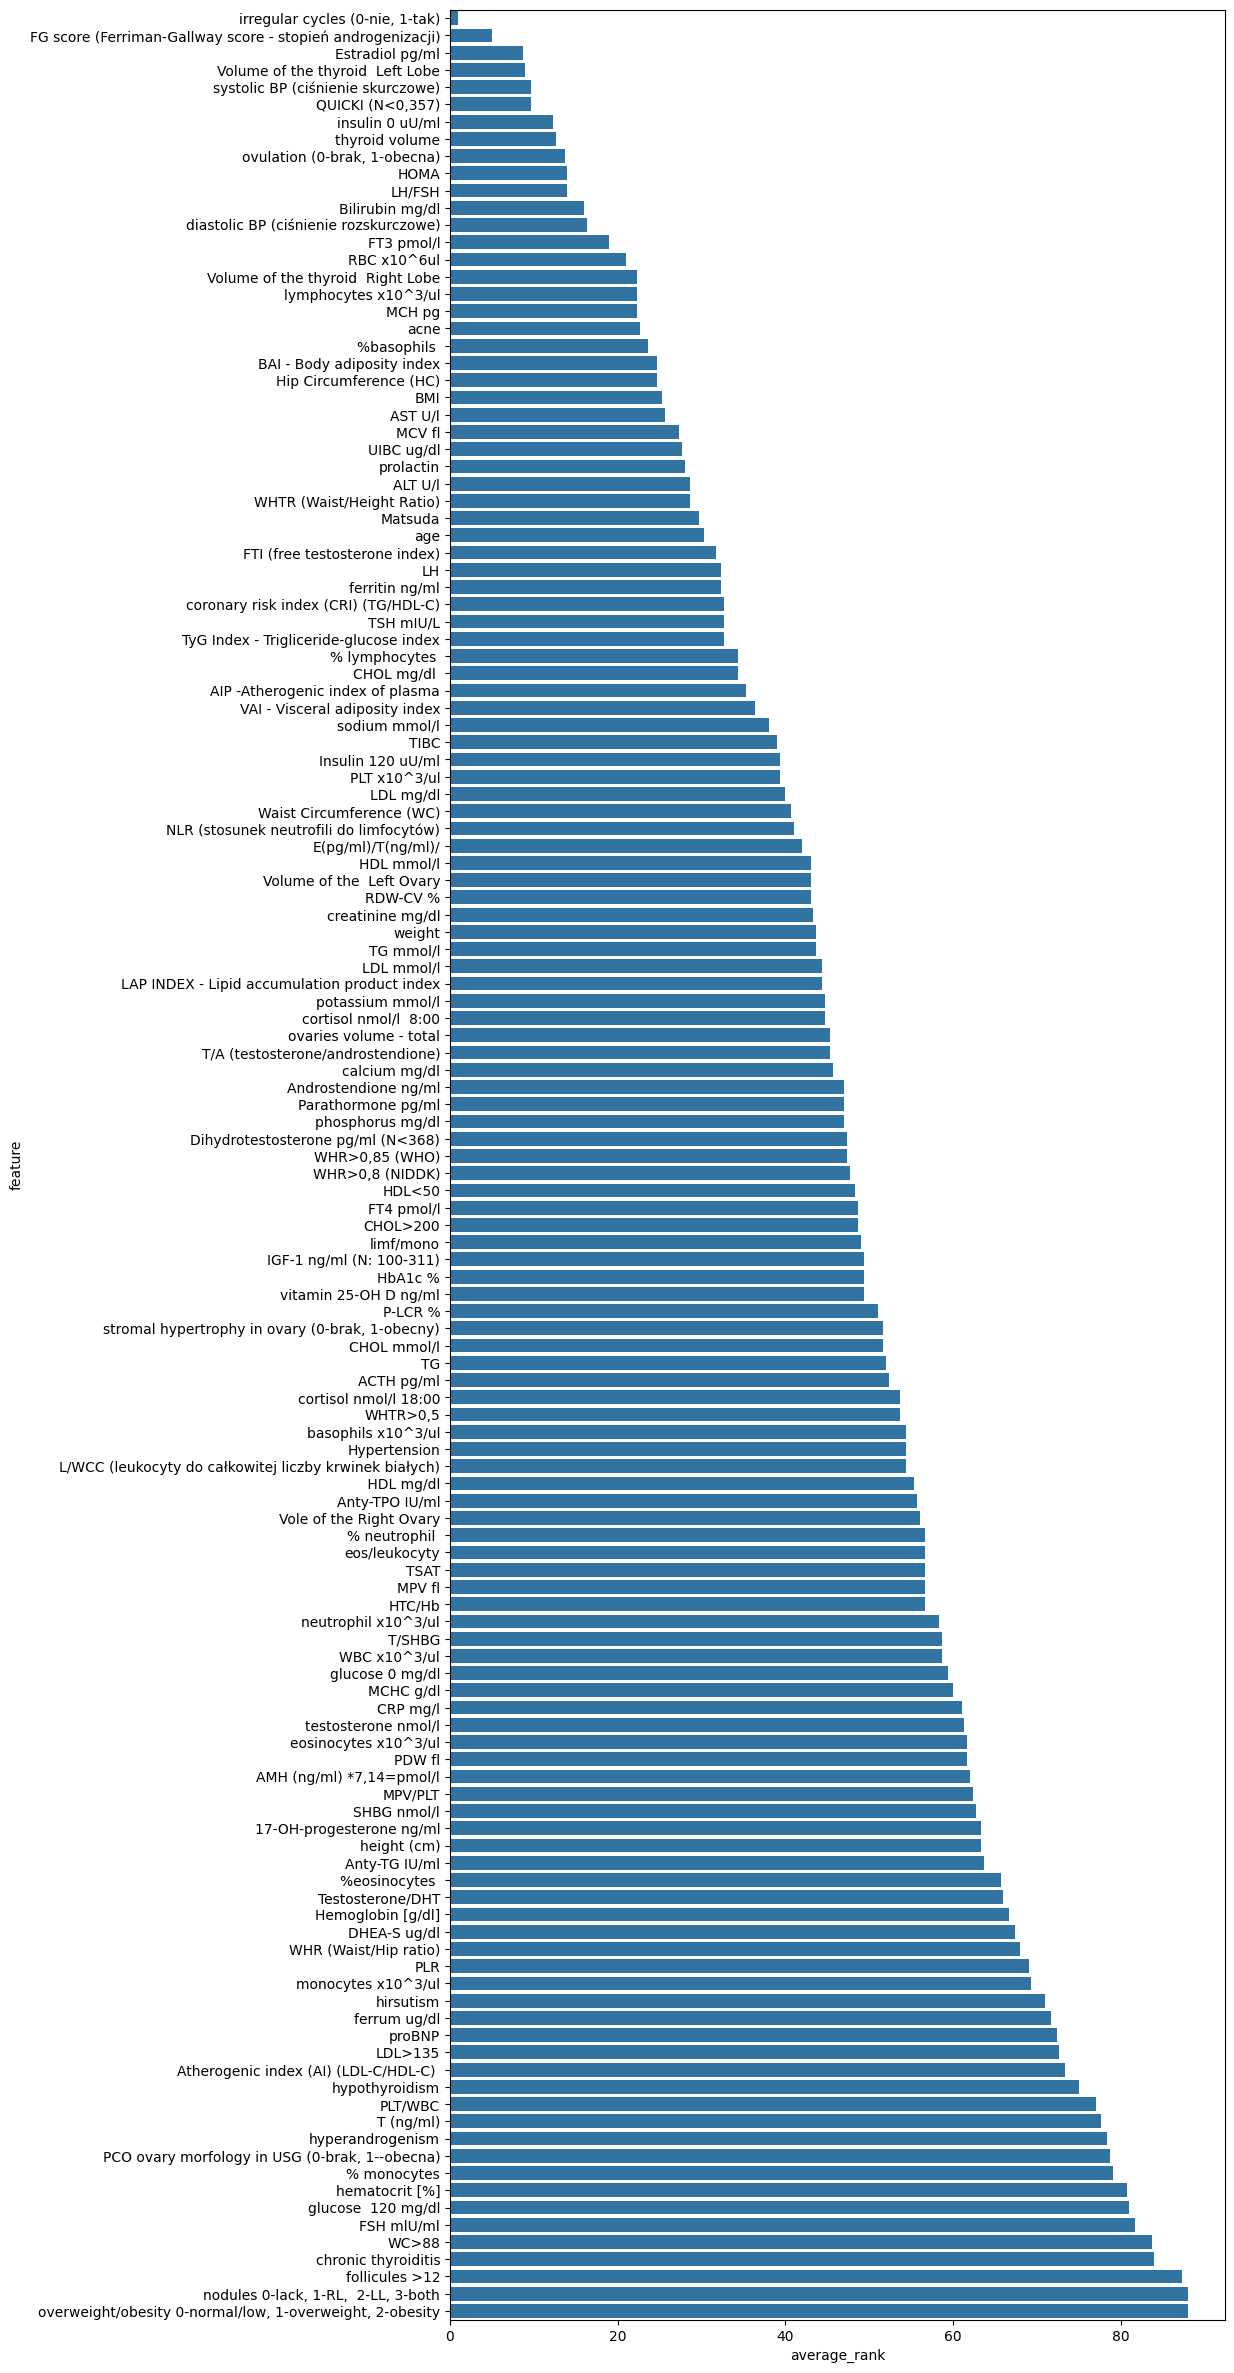

In [29]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [34]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 45 features:


['irregular cycles (0-nie, 1-tak)',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'Estradiol pg/ml',
 'Volume of the thyroid  Left Lobe',
 'systolic BP (ciśnienie skurczowe)',
 'QUICKI (N<0,357)',
 'insulin 0 uU/ml',
 'thyroid volume',
 'ovulation (0-brak, 1-obecna)',
 'HOMA',
 'LH/FSH',
 'Bilirubin mg/dl',
 'diastolic BP (ciśnienie rozskurczowe)',
 'FT3 pmol/l',
 'RBC x10^6ul',
 'Volume of the thyroid  Right Lobe',
 'lymphocytes x10^3/ul',
 'MCH pg',
 'acne',
 '%basophils ',
 'BAI - Body adiposity index',
 'Hip Circumference (HC)',
 'BMI',
 'AST U/l',
 'MCV fl',
 'UIBC ug/dl',
 'prolactin',
 'ALT U/l',
 'WHTR (Waist/Height Ratio)',
 'Matsuda',
 'age',
 'FTI (free testosterone index)',
 'LH',
 'ferritin ng/ml',
 'coronary risk index (CRI) (TG/HDL-C)',
 'TSH mIU/L',
 'TyG Index - Trigliceride-glucose index',
 '% lymphocytes ',
 'CHOL mg/dl ',
 'AIP -Atherogenic index of plasma',
 'VAI - Visceral adiposity index',
 'sodium mmol/l',
 'TIBC',
 'Insulin 120 uU/ml',
 'PLT x

## Feature selection

### Chi 2

In [31]:
# del selected_features_map['chi_2']

Selected 3 features


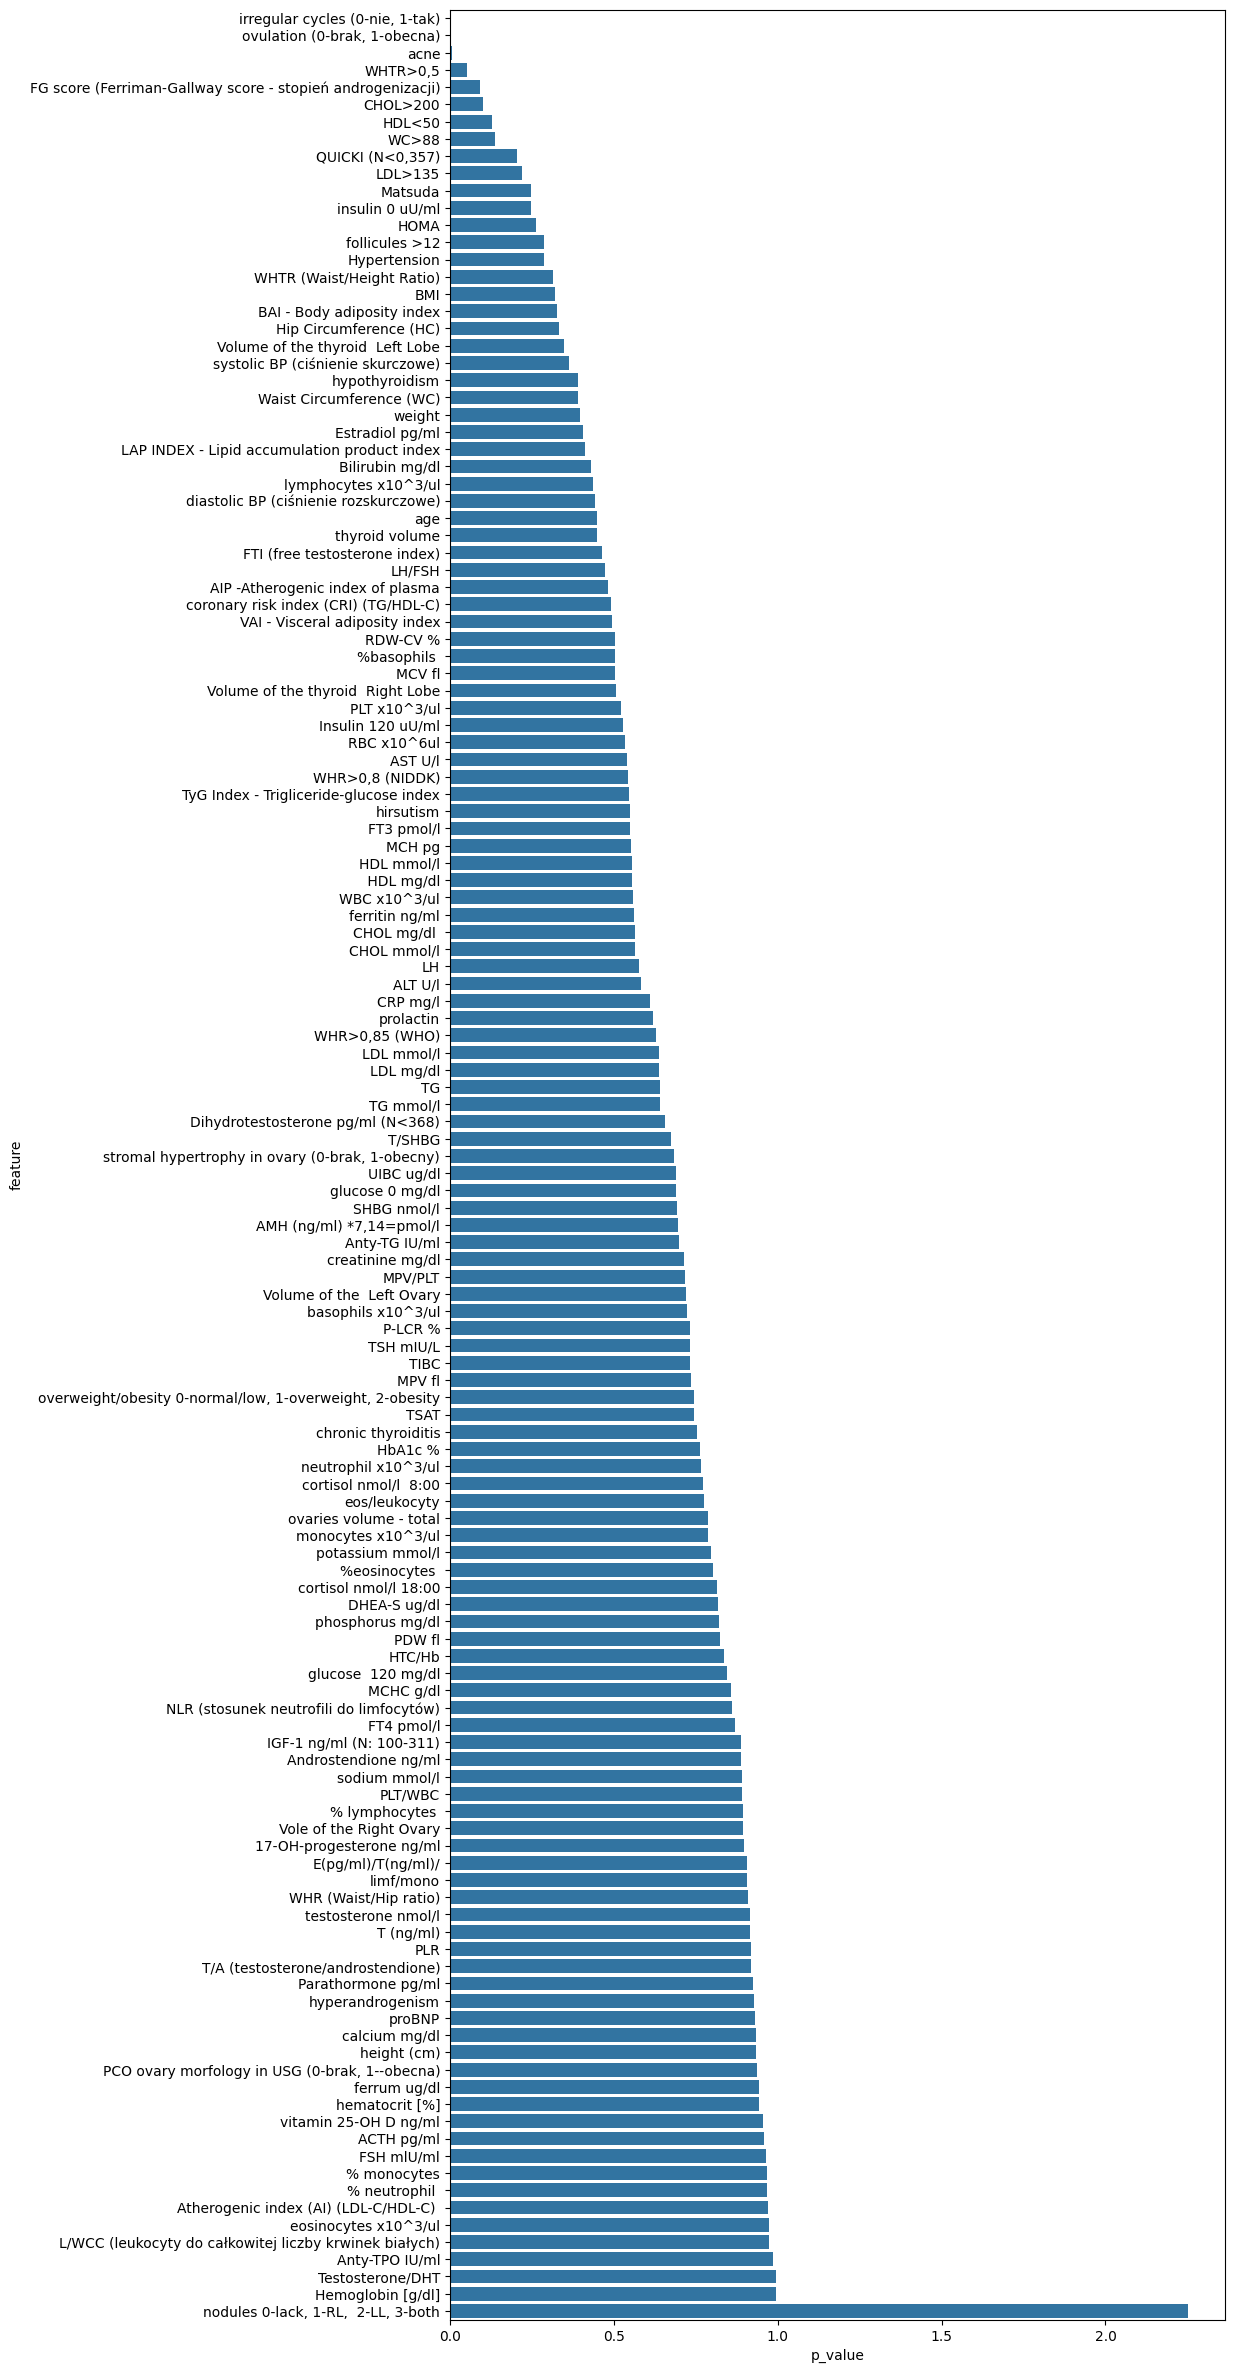

['irregular cycles (0-nie, 1-tak)', 'ovulation (0-brak, 1-obecna)', 'acne']

In [30]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k='all'), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

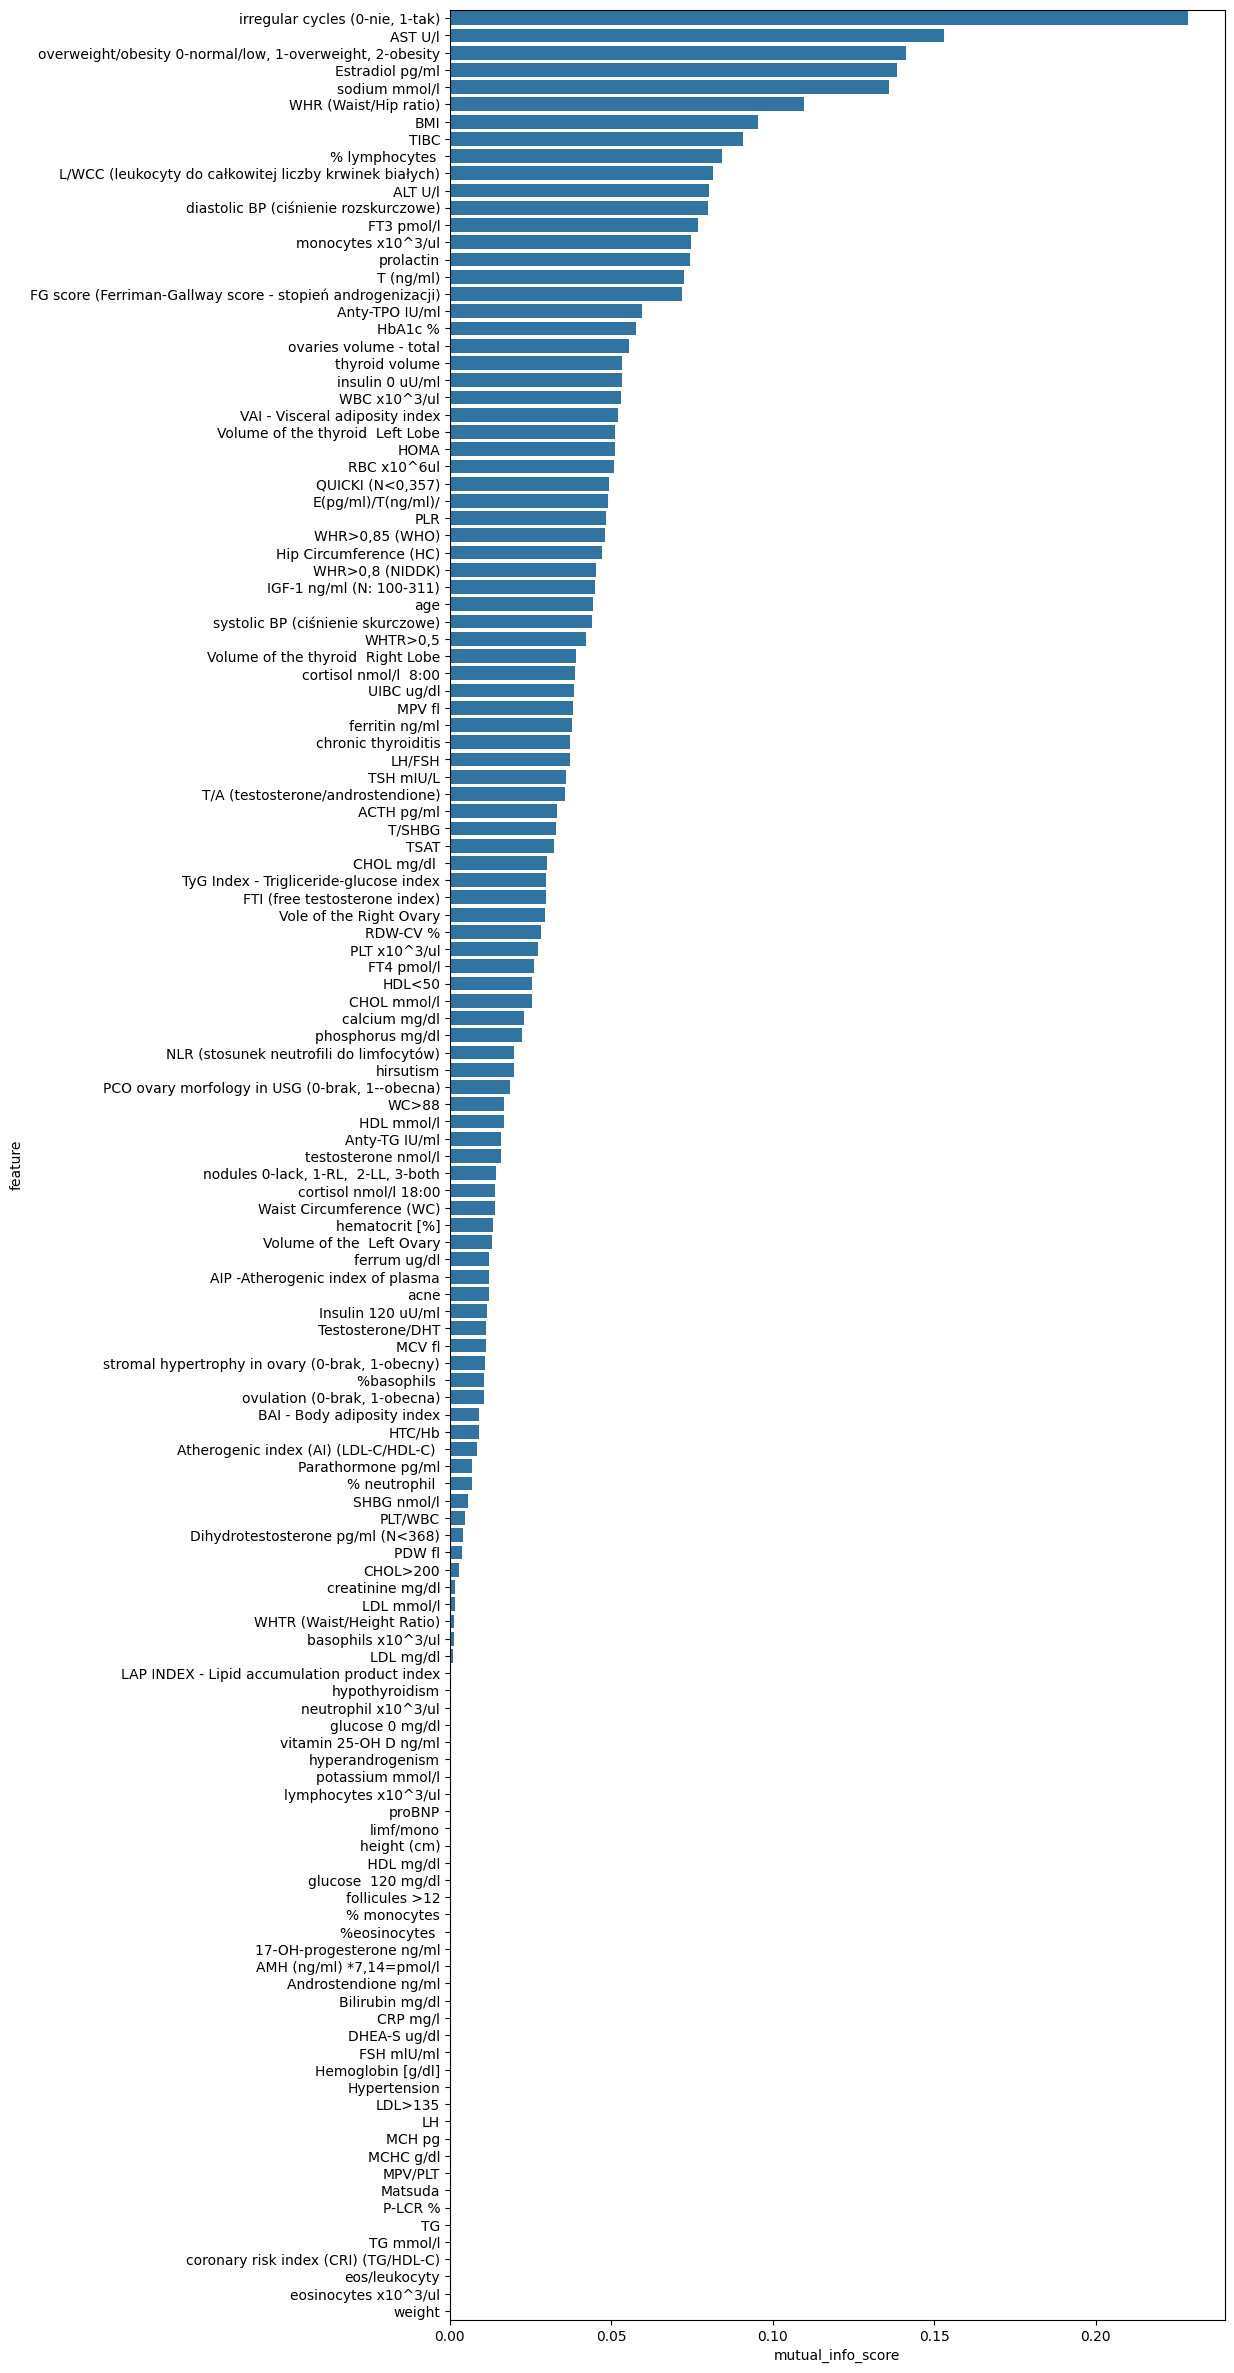

Selected 87 features


In [36]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

Optimal number of features: 66


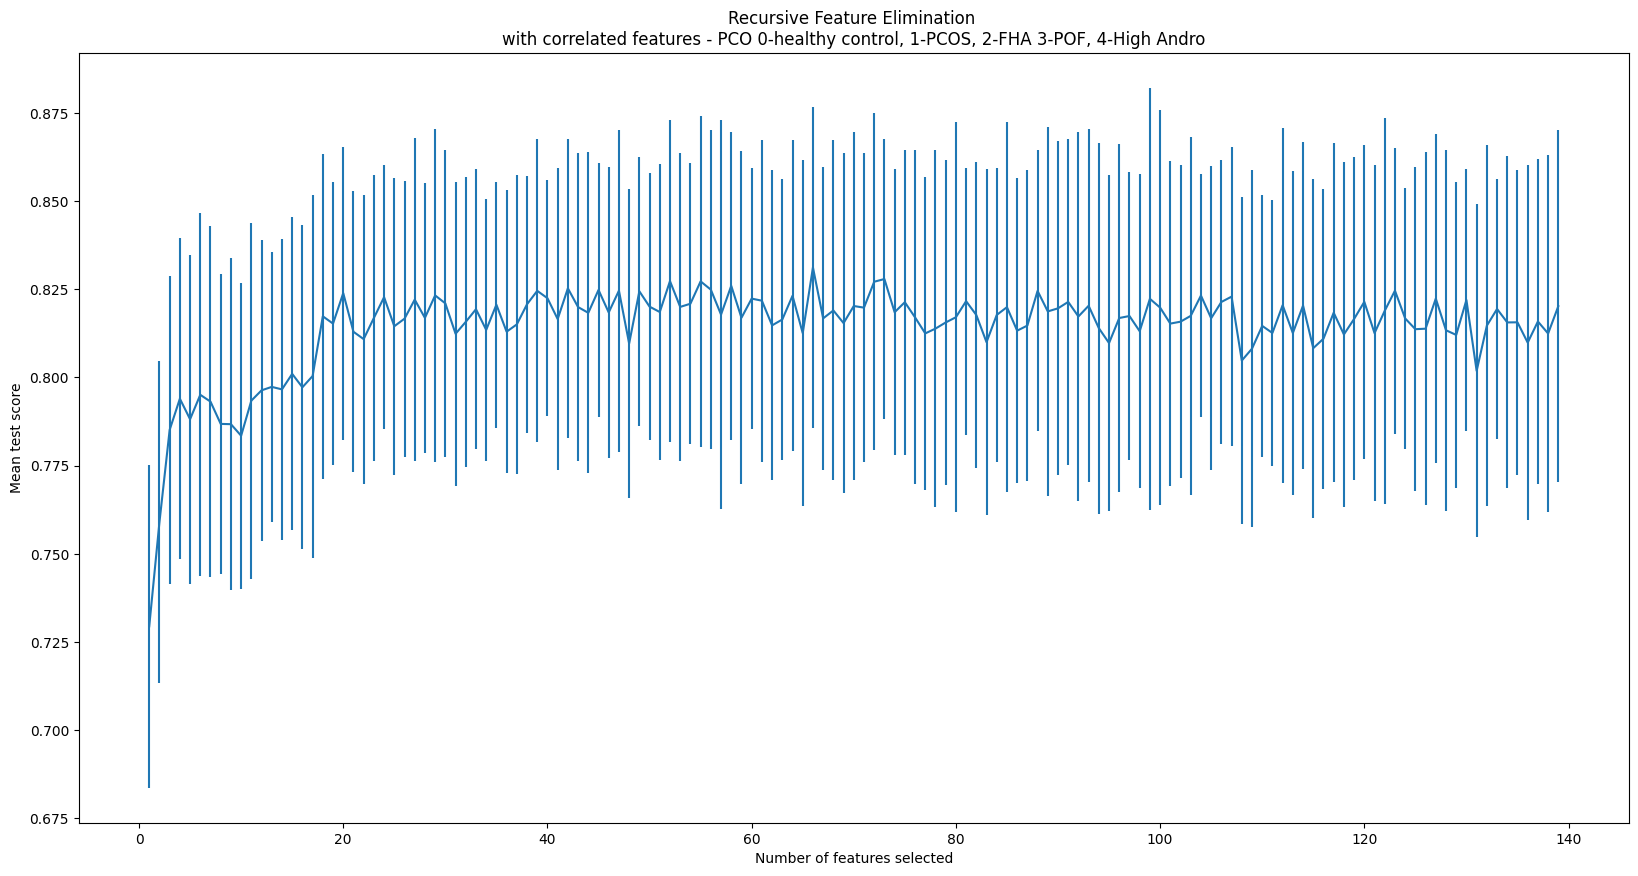

['LH',
 'T/A (testosterone/androstendione)',
 'irregular cycles (0-nie, 1-tak)',
 'QUICKI (N<0,357)',
 'Parathormone pg/ml',
 'lymphocytes x10^3/ul',
 'Matsuda',
 'MCV fl',
 'MCH pg',
 'LH/FSH',
 'calcium mg/dl',
 'ovaries volume - total',
 'LDL mmol/l',
 'LAP INDEX - Lipid accumulation product index',
 'Insulin 120 uU/ml',
 'IGF-1 ng/ml (N: 100-311)',
 'T/SHBG',
 'ovulation (0-brak, 1-obecna)',
 'TG mmol/l',
 'TSAT',
 'cortisol nmol/l  8:00',
 'cortisol nmol/l 18:00',
 'diastolic BP (ciśnienie rozskurczowe)',
 'ferritin ng/ml',
 'WHTR (Waist/Height Ratio)',
 'WHR (Waist/Hip ratio)',
 'insulin 0 uU/ml',
 'Volume of the thyroid  Right Lobe',
 'Volume of the thyroid  Left Lobe',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'VAI - Visceral adiposity index',
 'UIBC ug/dl',
 'Testosterone/DHT',
 'TSH mIU/L',
 'TIBC',
 'Hip Circumference (HC)',
 'coronary risk index (CRI) (TG/HDL-C)',
 'sodium mmol/l',
 'BMI',
 'CRP mg/l',
 'BAI - Body adiposity index',
 'systolic BP (ciśnienie

In [37]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

Selected 132 features


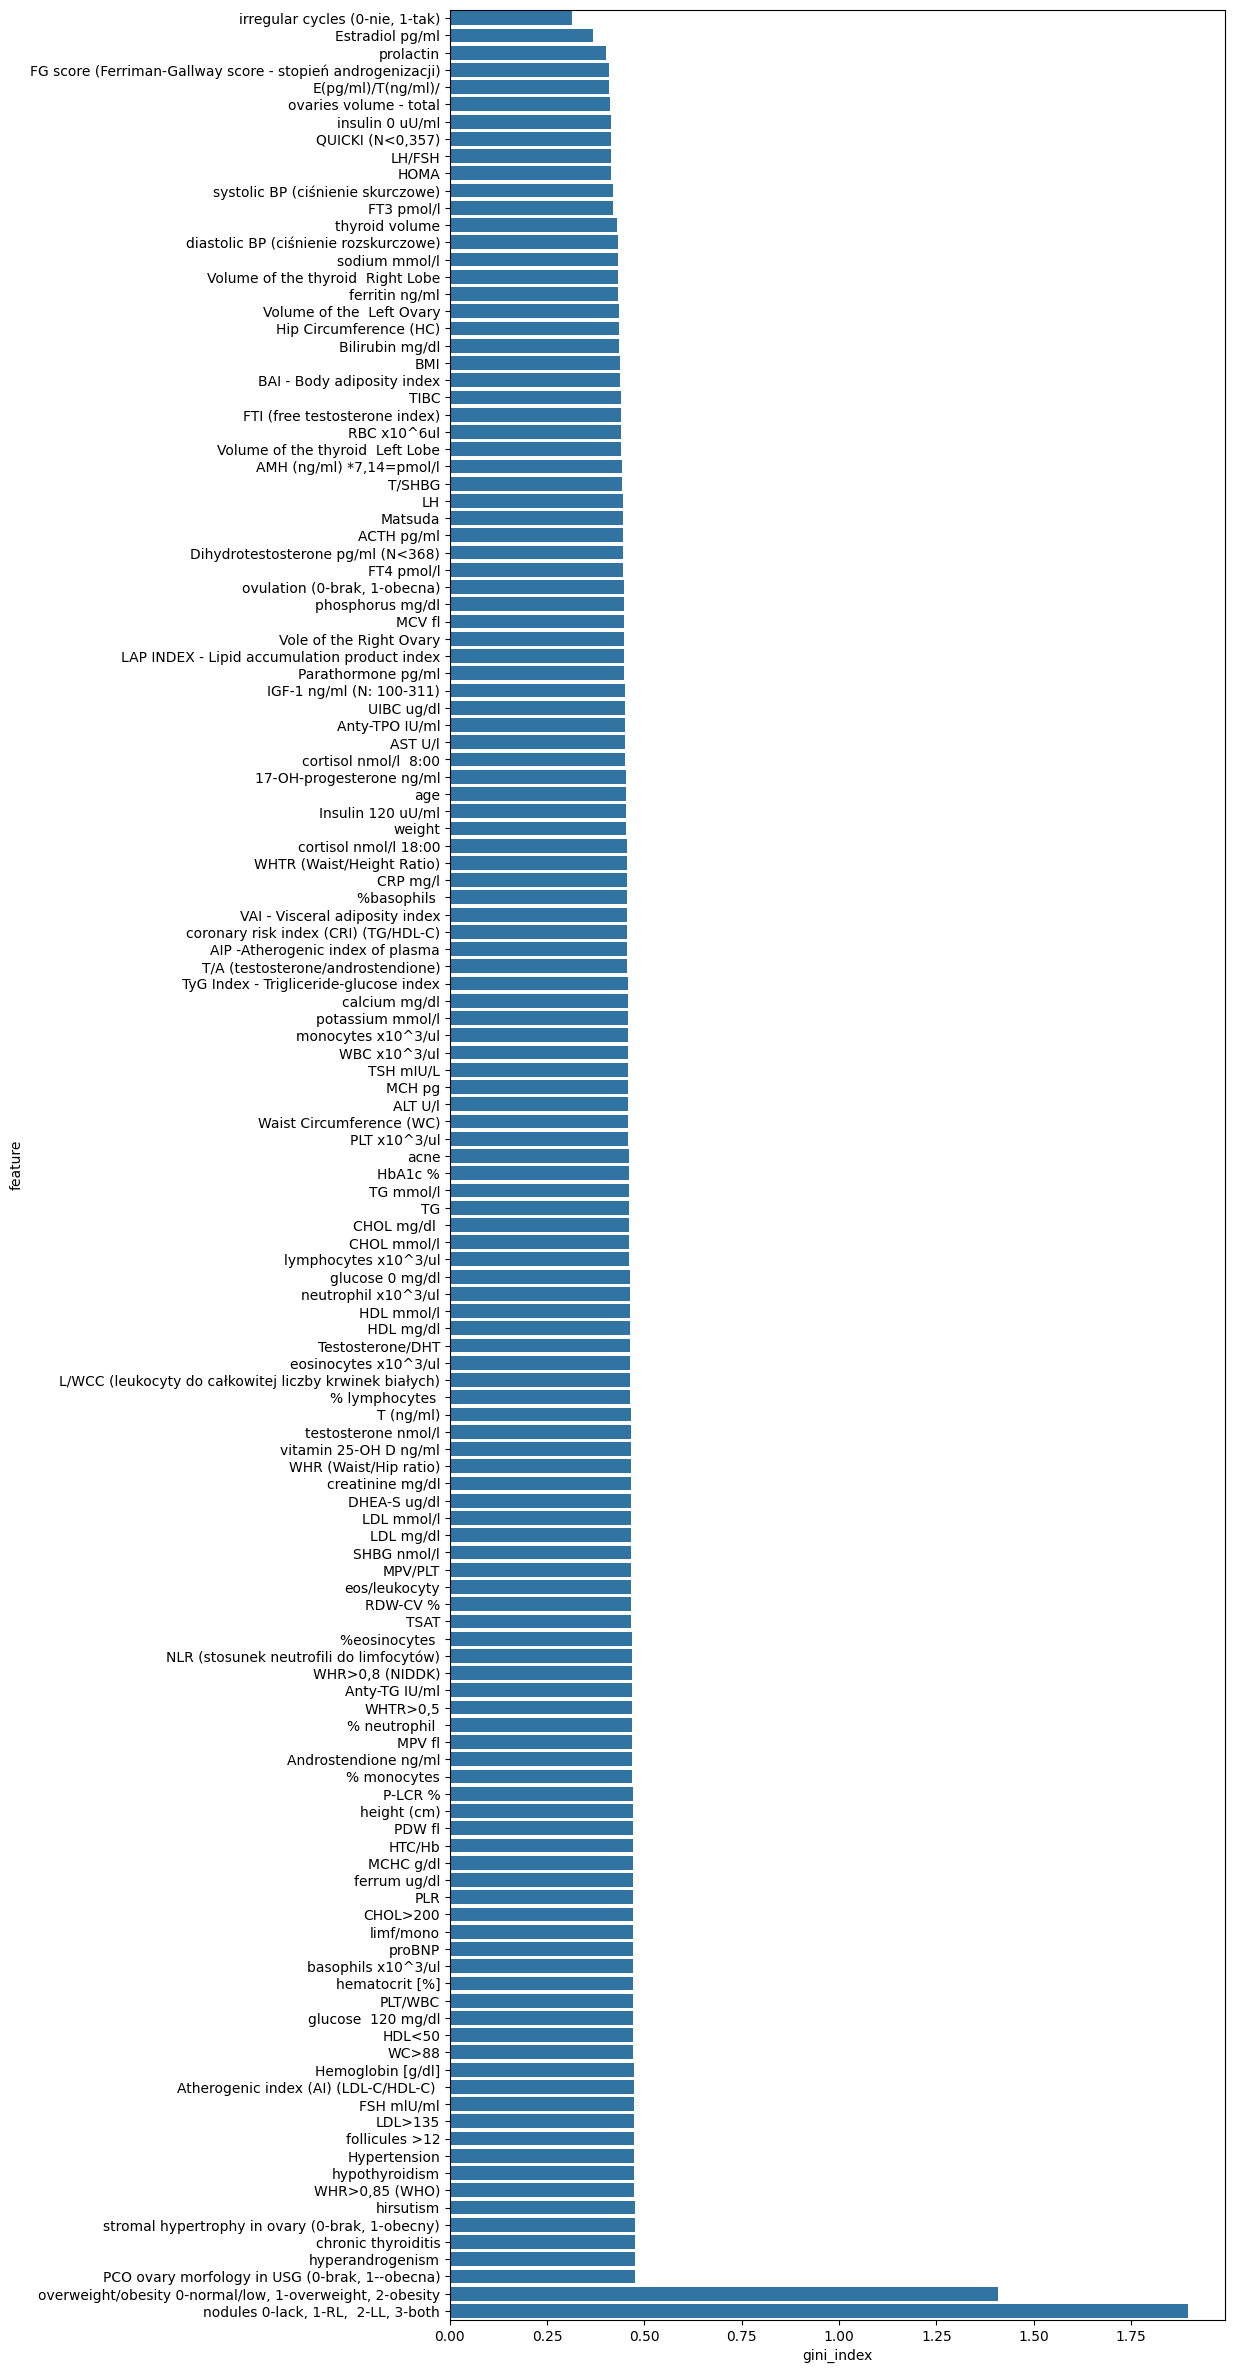

['irregular cycles (0-nie, 1-tak)',
 'Estradiol pg/ml',
 'prolactin',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'E(pg/ml)/T(ng/ml)/',
 'ovaries volume - total',
 'insulin 0 uU/ml',
 'QUICKI (N<0,357)',
 'LH/FSH',
 'HOMA',
 'systolic BP (ciśnienie skurczowe)',
 'FT3 pmol/l',
 'thyroid volume',
 'diastolic BP (ciśnienie rozskurczowe)',
 'sodium mmol/l',
 'Volume of the thyroid  Right Lobe',
 'ferritin ng/ml',
 'Volume of the  Left Ovary',
 'Hip Circumference (HC)',
 'Bilirubin mg/dl',
 'BMI',
 'BAI - Body adiposity index',
 'TIBC',
 'FTI (free testosterone index)',
 'RBC x10^6ul',
 'Volume of the thyroid  Left Lobe',
 'AMH (ng/ml) *7,14=pmol/l',
 'T/SHBG',
 'LH',
 'Matsuda',
 'ACTH pg/ml',
 'Dihydrotestosterone pg/ml (N<368)',
 'FT4 pmol/l',
 'ovulation (0-brak, 1-obecna)',
 'phosphorus mg/dl',
 'MCV fl',
 'Vole of the Right Ovary',
 'LAP INDEX - Lipid accumulation product index',
 'Parathormone pg/ml',
 'IGF-1 ng/ml (N: 100-311)',
 'UIBC ug/dl',
 'Anty-TPO IU/ml',


In [38]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

selected 111 features


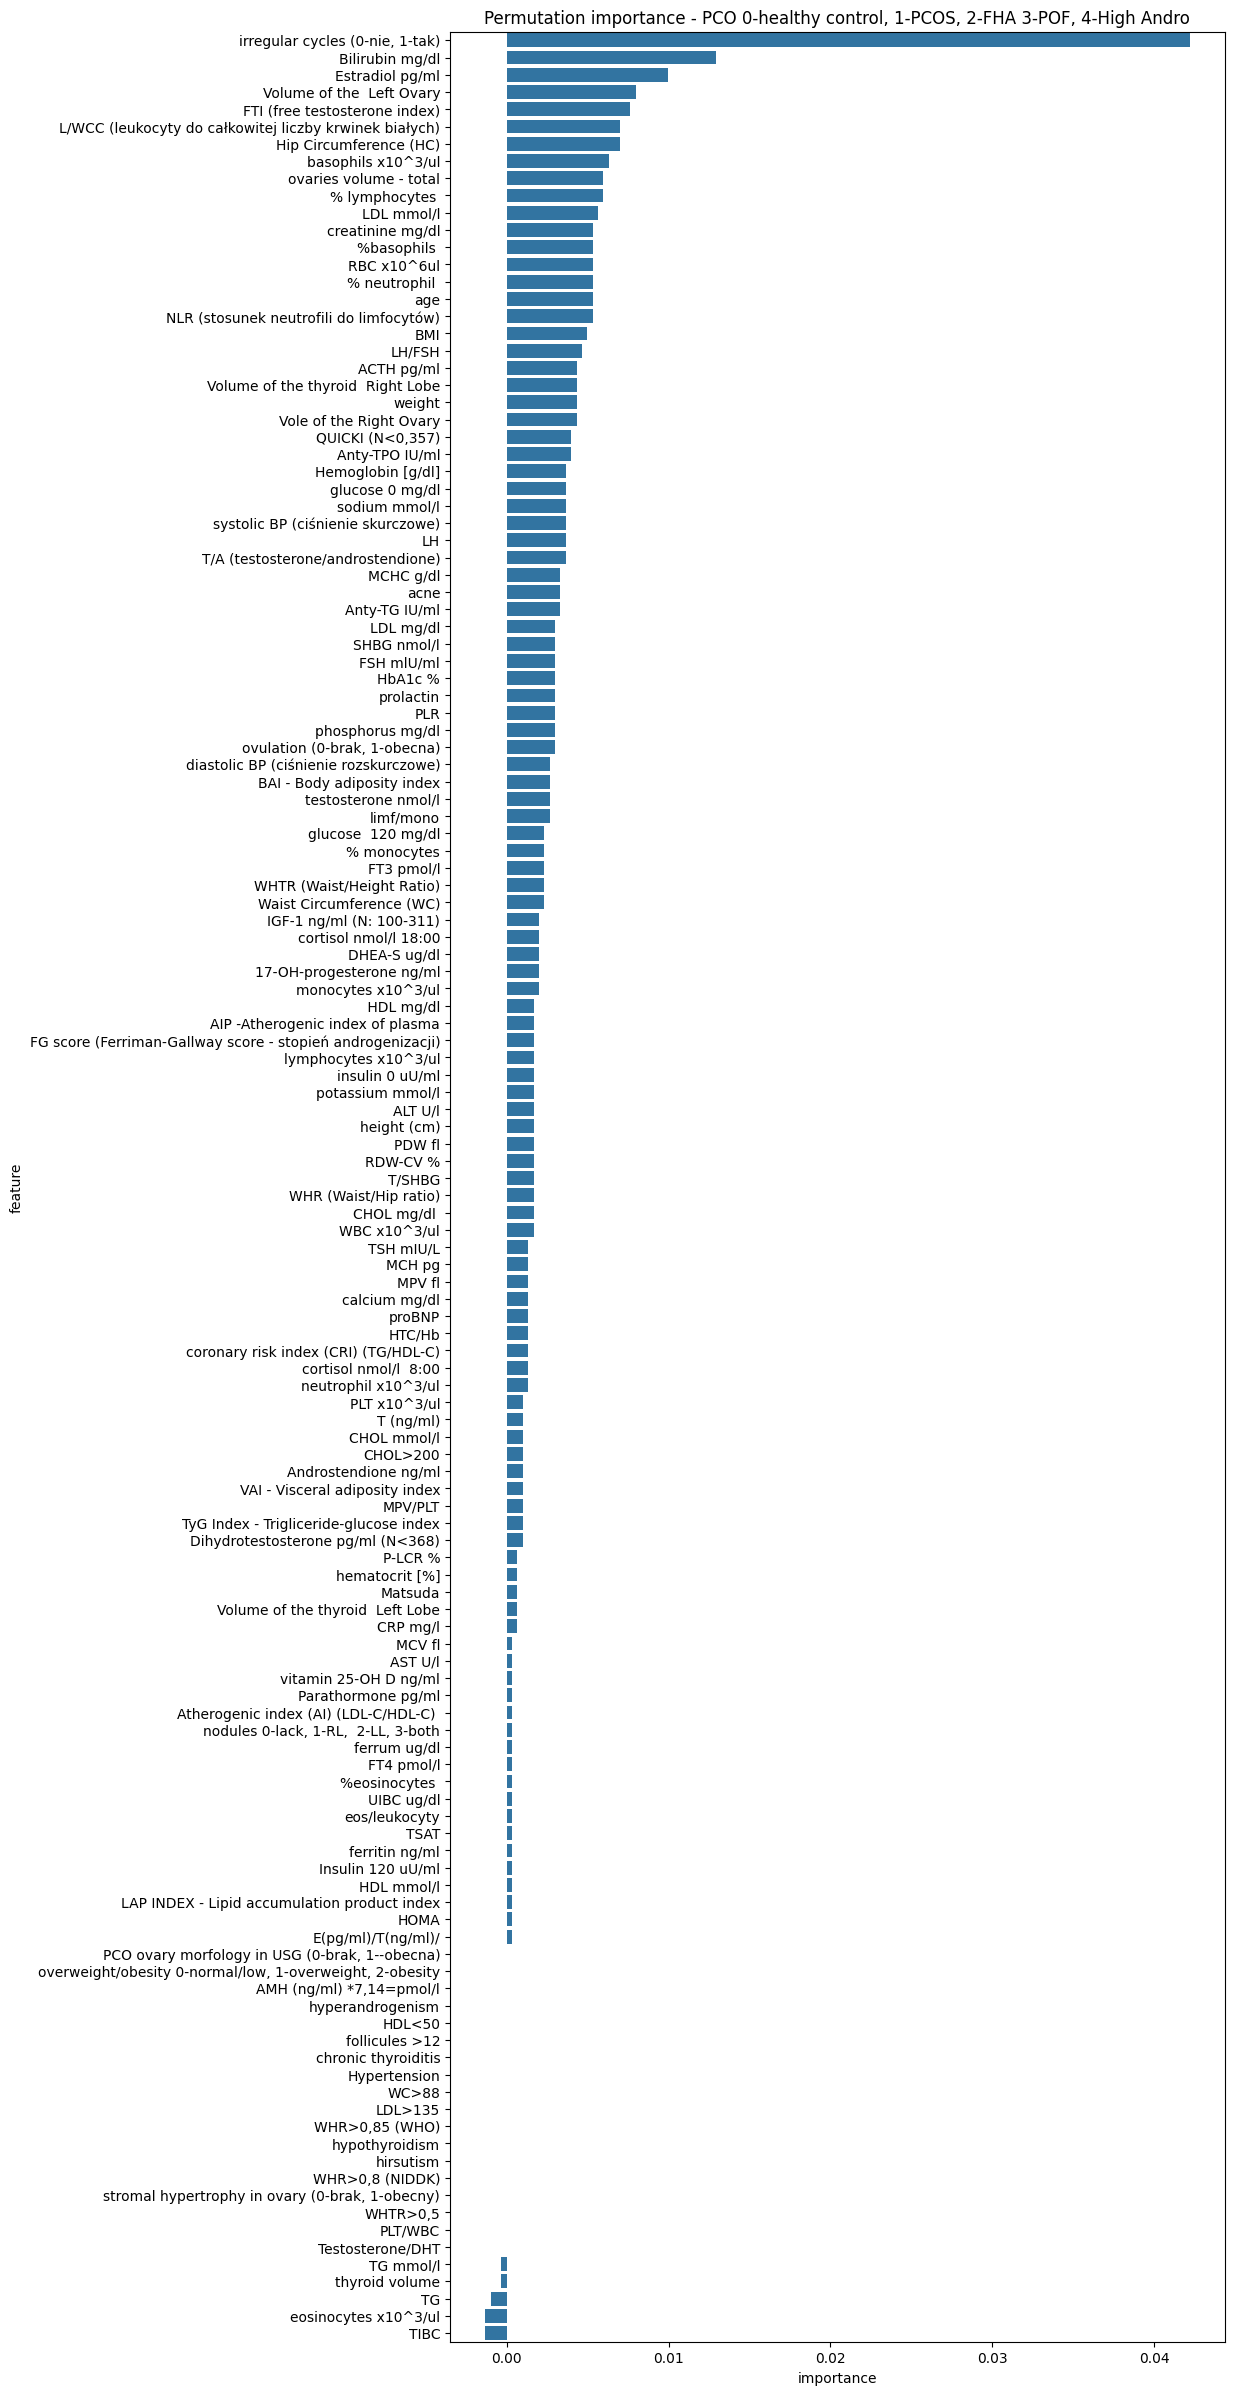

Actually selected 111 features


In [39]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [40]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

28
['ferritin ng/ml', 'QUICKI (N<0,357)', 'BMI', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'irregular cycles (0-nie, 1-tak)', 'insulin 0 uU/ml', 'VAI - Visceral adiposity index', 'Volume of the thyroid  Right Lobe', 'diastolic BP (ciśnienie rozskurczowe)', 'LH/FSH', 'FTI (free testosterone index)', 'Volume of the thyroid  Left Lobe', 'systolic BP (ciśnienie skurczowe)', 'AST U/l', '% lymphocytes ', 'TSH mIU/L', 'HOMA', 'Hip Circumference (HC)', 'MCV fl', 'FT3 pmol/l', 'Insulin 120 uU/ml', 'AIP -Atherogenic index of plasma', 'prolactin', 'sodium mmol/l', 'BAI - Body adiposity index', 'UIBC ug/dl', 'Estradiol pg/ml', 'ovulation (0-brak, 1-obecna)']


0
0                                               ferritin ng/ml
1                                             QUICKI (N<0,357)
2                                                          BMI
3   FG score (Ferriman-Gallway score - stopień androgenizacji)
4                              irregular cycles (0-nie, 1-tak)
5                                              insulin 0 uU/ml
6                               VAI - Visceral adiposity index
7                            Volume of the thyroid  Right Lobe
8                        diastolic BP (ciśnienie rozskurczowe)
9                                                       LH/FSH
10                               FTI (free testosterone index)
11                            Volume of the thyroid  Left Lobe
12                           systolic BP (ciśnienie skurczowe)
13                                                     AST U/l
14                                              % lymphocytes 
15                                                   TSH mIU/L
16                                                        HOMA
17                                      Hip Circumference (HC)
18                                                      MCV fl
19                                                  FT3 pmol/l
20                                           Insulin 120 uU/ml
21                            AIP -Atherogenic index of plasma
22                                                   prolactin
23                                               sodium mmol/l
24                                  BAI - Body adiposity index
25                                                  UIBC ug/dl
26                                             Estradiol pg/ml
27                                ovulation (0-brak, 1-obecna)

In [41]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

126
['thyroid volume', 'AMH (ng/ml) *7,14=pmol/l', 'CHOL mg/dl ', 'PLR', 'LDL mg/dl', 'phosphorus mg/dl', 'coronary risk index (CRI) (TG/HDL-C)', 'age', 'T/A (testosterone/androstendione)', 'potassium mmol/l', 'glucose  120 mg/dl', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', 'monocytes x10^3/ul', 'insulin 0 uU/ml', 'diastolic BP (ciśnienie rozskurczowe)', 'systolic BP (ciśnienie skurczowe)', 'AST U/l', 'PDW fl', 'LAP INDEX - Lipid accumulation product index', 'FT4 pmol/l', 'T/SHBG', 'prolactin', '% neutrophil ', 'MPV/PLT', 'acne', 'Estradiol pg/ml', 'HDL mmol/l', '%basophils ', 'creatinine mg/dl', 'TIBC', 'overweight/obesity 0-normal/low, 1-overweight, 2-obesity', 'CRP mg/l', 'L/WCC (leukocyty do całkowitej liczby krwinek białych)', 'eos/leukocyty', 'BMI', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'SHBG nmol/l', 'cortisol nmol/l 18:00', 'Anty-TG IU/ml', 'Volume of the thyroid  Right Lobe', '%eosinocytes ', 'Volume of the thyroid  Left Lobe', 'LH/FSH', 'Hemogl

## Test the subset of features

In [ ]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

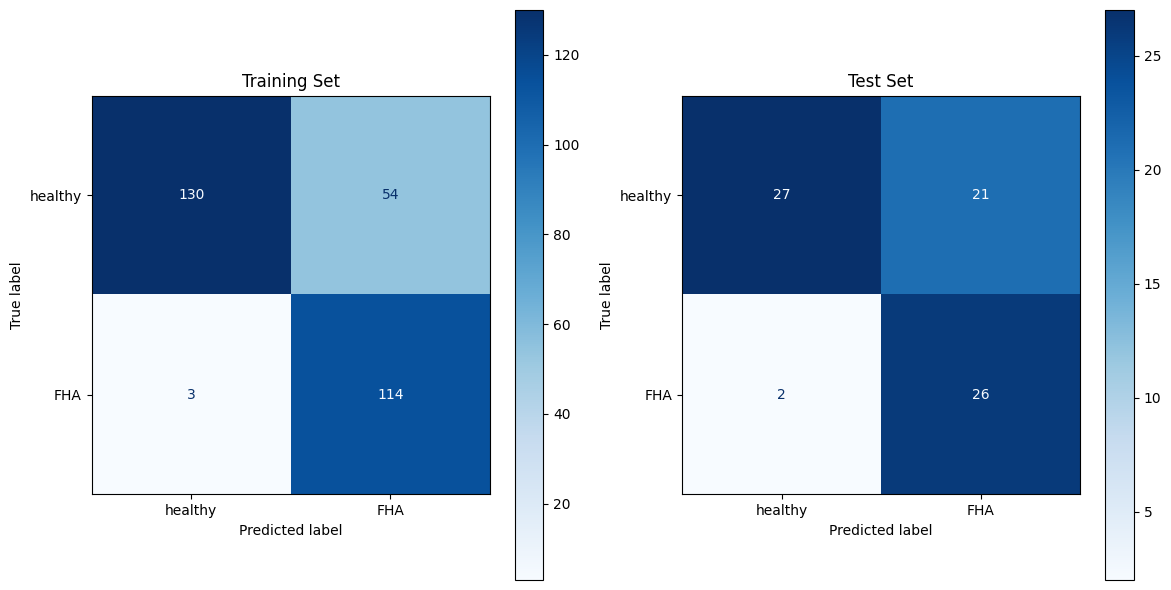

Training set
              precision    recall  f1-score   support

     healthy       0.98      0.71      0.82       184
         FHA       0.68      0.97      0.80       117

    accuracy                           0.81       301
   macro avg       0.83      0.84      0.81       301
weighted avg       0.86      0.81      0.81       301

Test set
              precision    recall  f1-score   support

     healthy       0.93      0.56      0.70        48
         FHA       0.55      0.93      0.69        28

    accuracy                           0.70        76
   macro avg       0.74      0.75      0.70        76
weighted avg       0.79      0.70      0.70        76



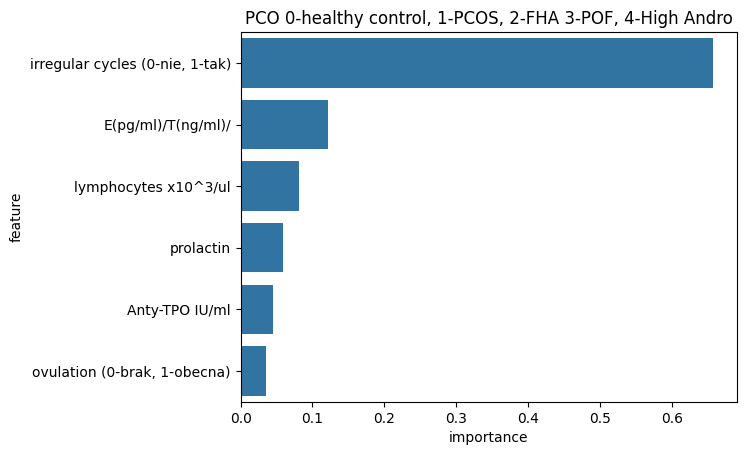

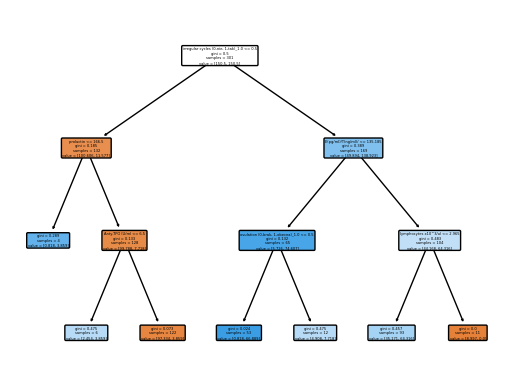

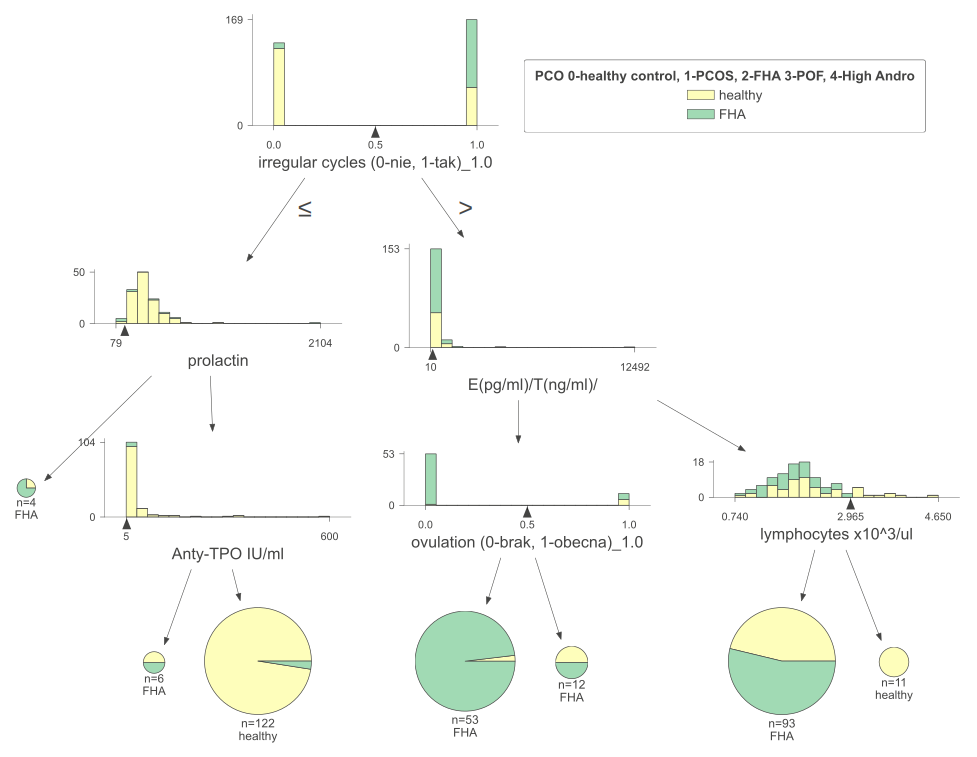

In [45]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=5, class_weight='balanced')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

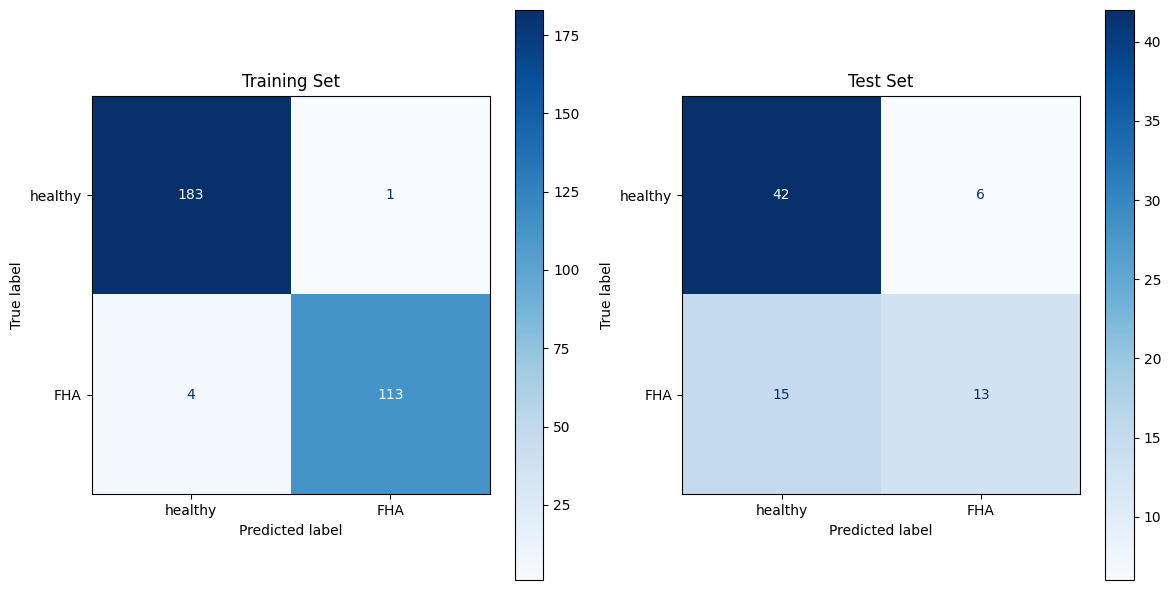

Training set
              precision    recall  f1-score   support

     healthy       0.98      0.99      0.99       184
         FHA       0.99      0.97      0.98       117

    accuracy                           0.98       301
   macro avg       0.98      0.98      0.98       301
weighted avg       0.98      0.98      0.98       301

Test set
              precision    recall  f1-score   support

     healthy       0.74      0.88      0.80        48
         FHA       0.68      0.46      0.55        28

    accuracy                           0.72        76
   macro avg       0.71      0.67      0.68        76
weighted avg       0.72      0.72      0.71        76



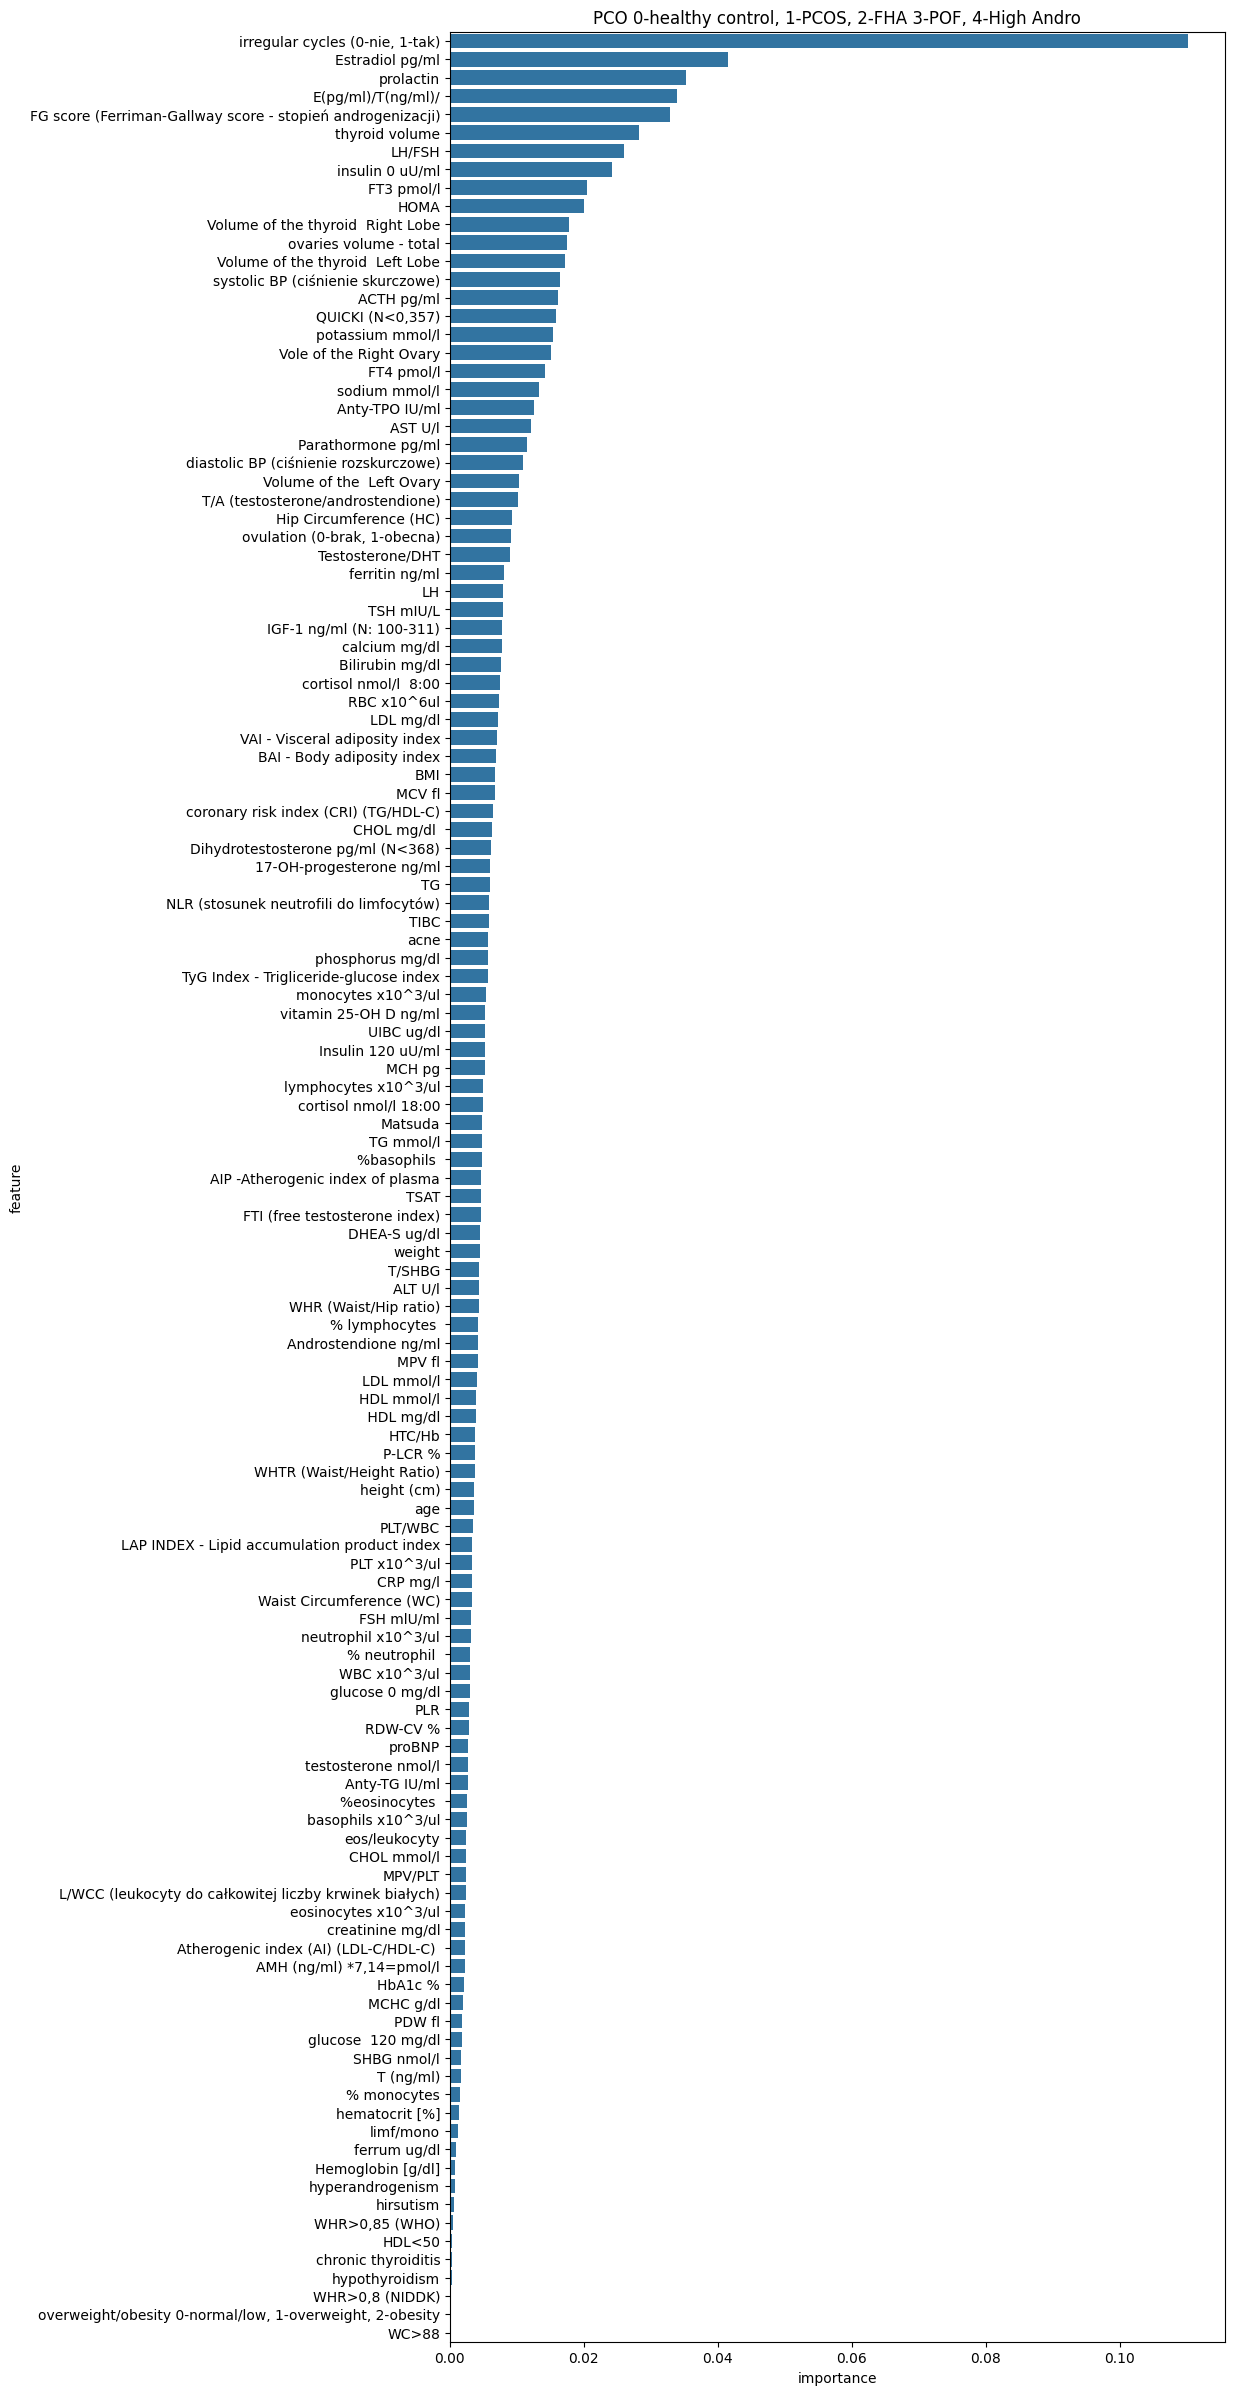

In [43]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

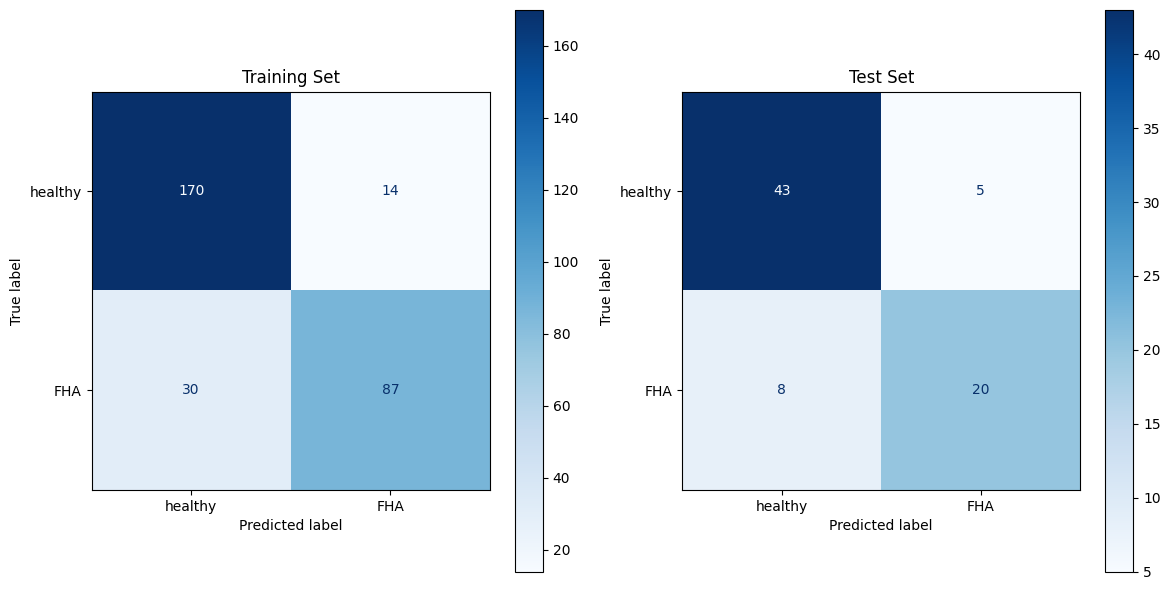

Training set
              precision    recall  f1-score   support

     healthy       0.85      0.92      0.89       184
         FHA       0.86      0.74      0.80       117

    accuracy                           0.85       301
   macro avg       0.86      0.83      0.84       301
weighted avg       0.85      0.85      0.85       301

Test set
              precision    recall  f1-score   support

     healthy       0.84      0.90      0.87        48
         FHA       0.80      0.71      0.75        28

    accuracy                           0.83        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.83      0.83      0.83        76



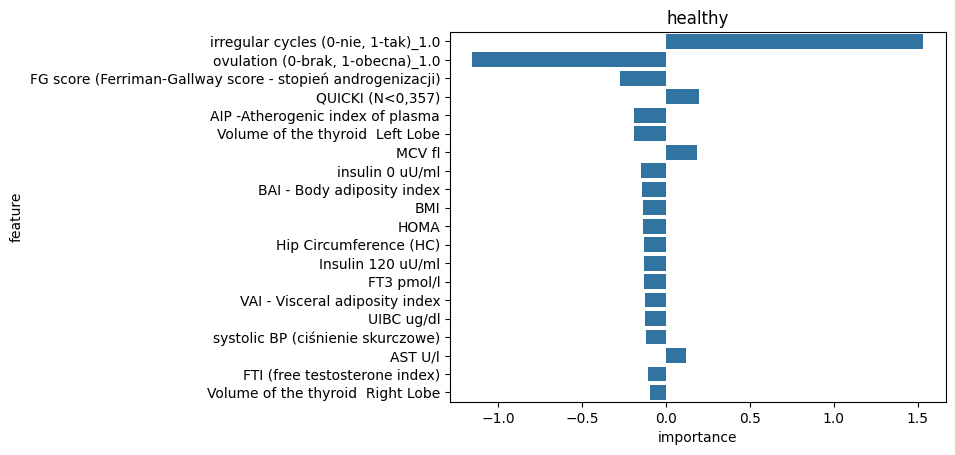

In [46]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)